In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import tensorflow as tf

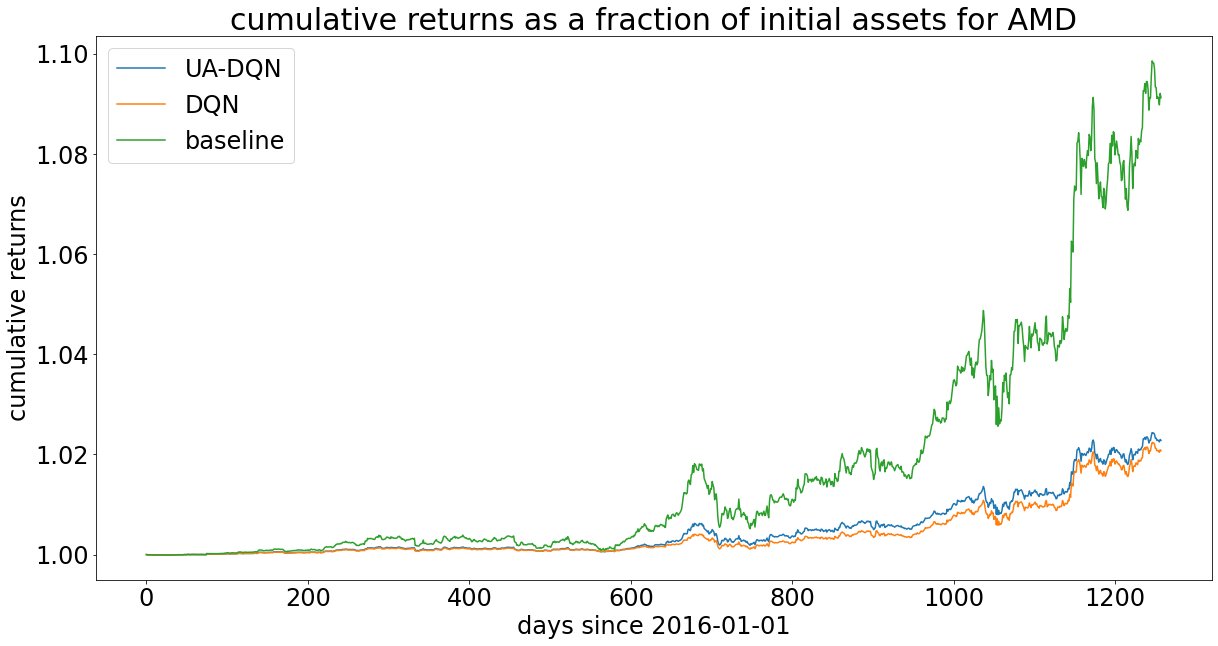

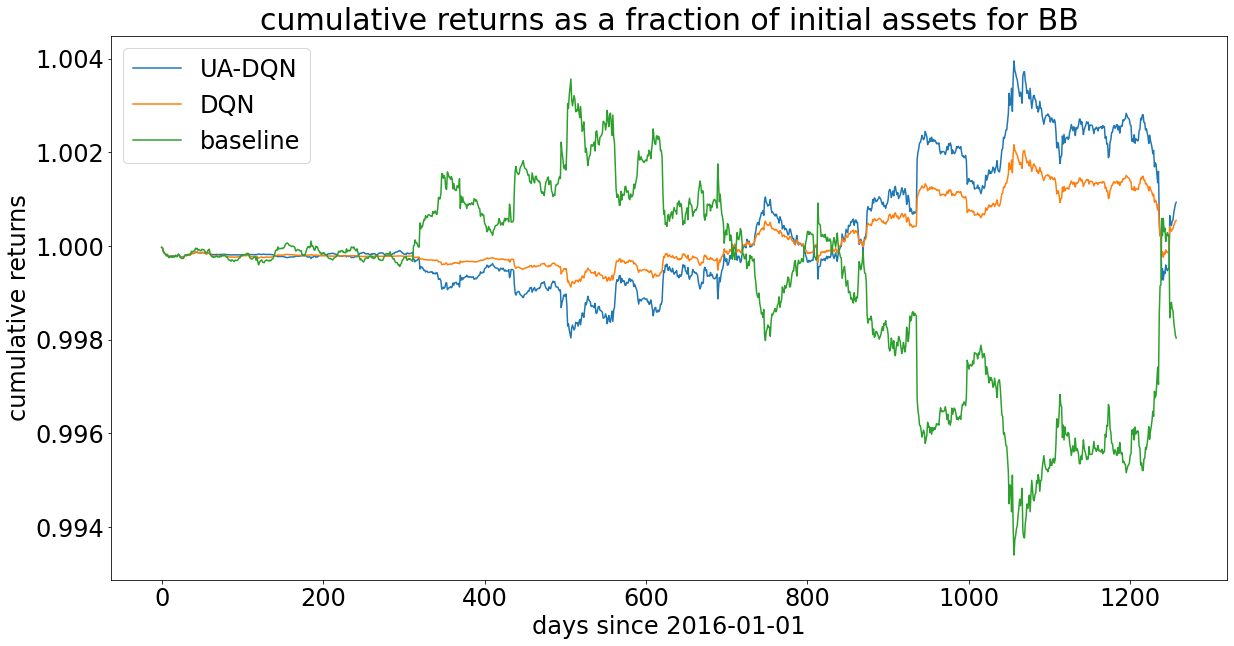

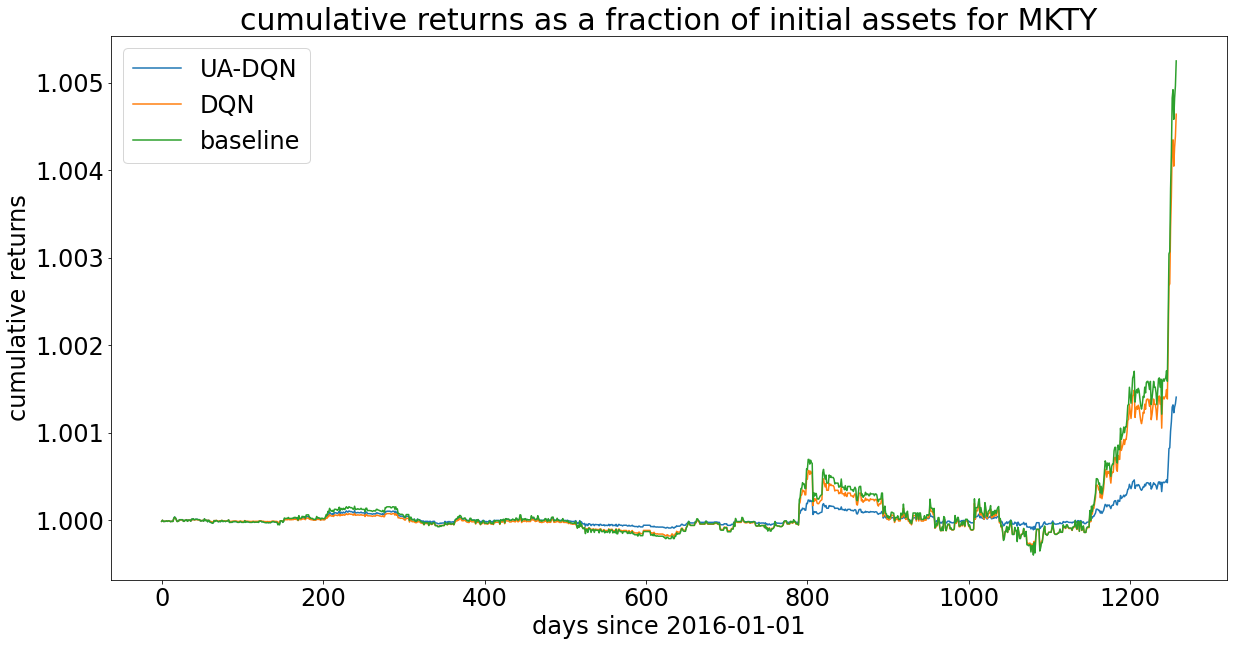

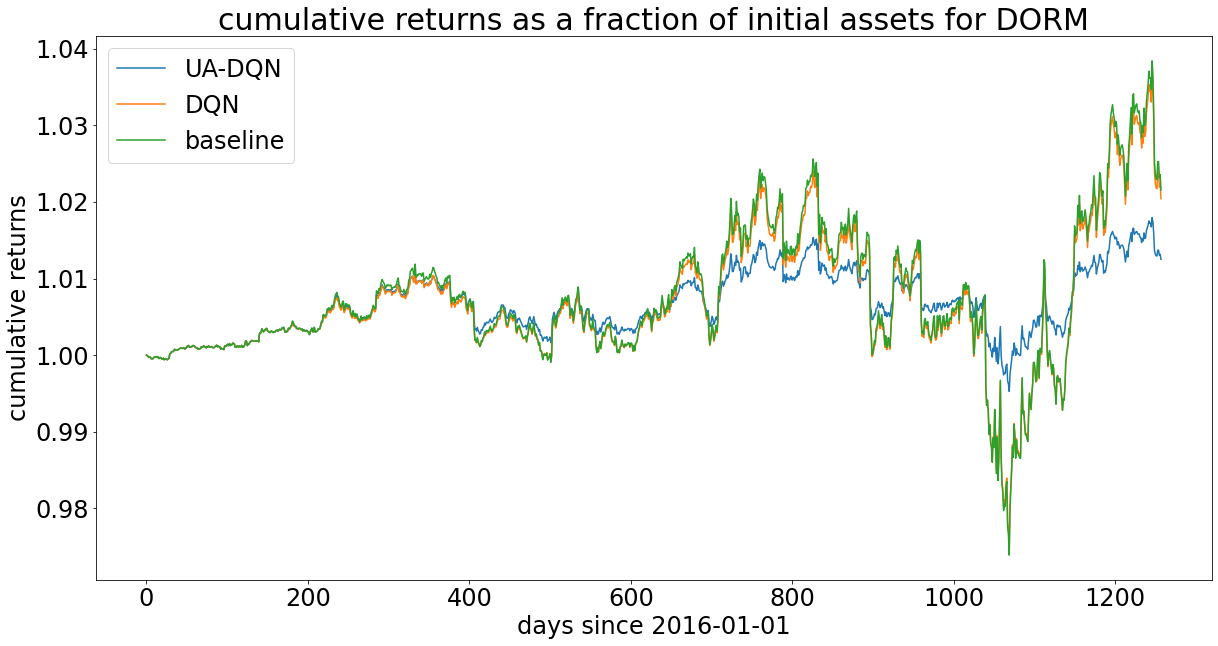

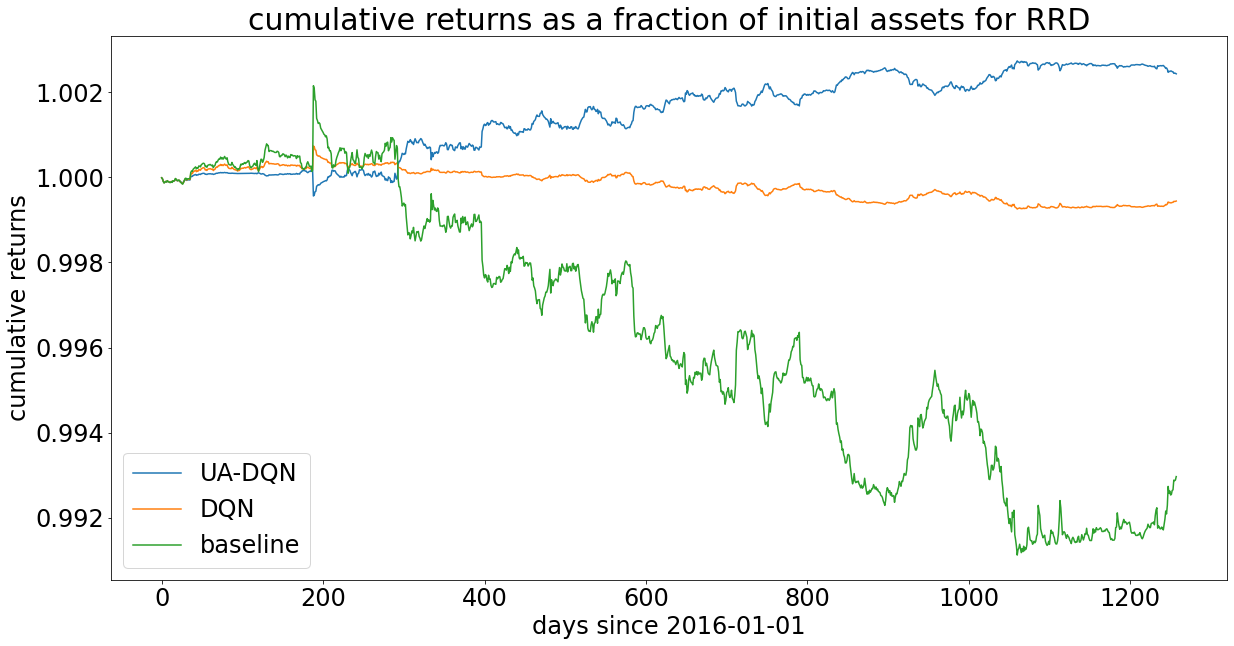

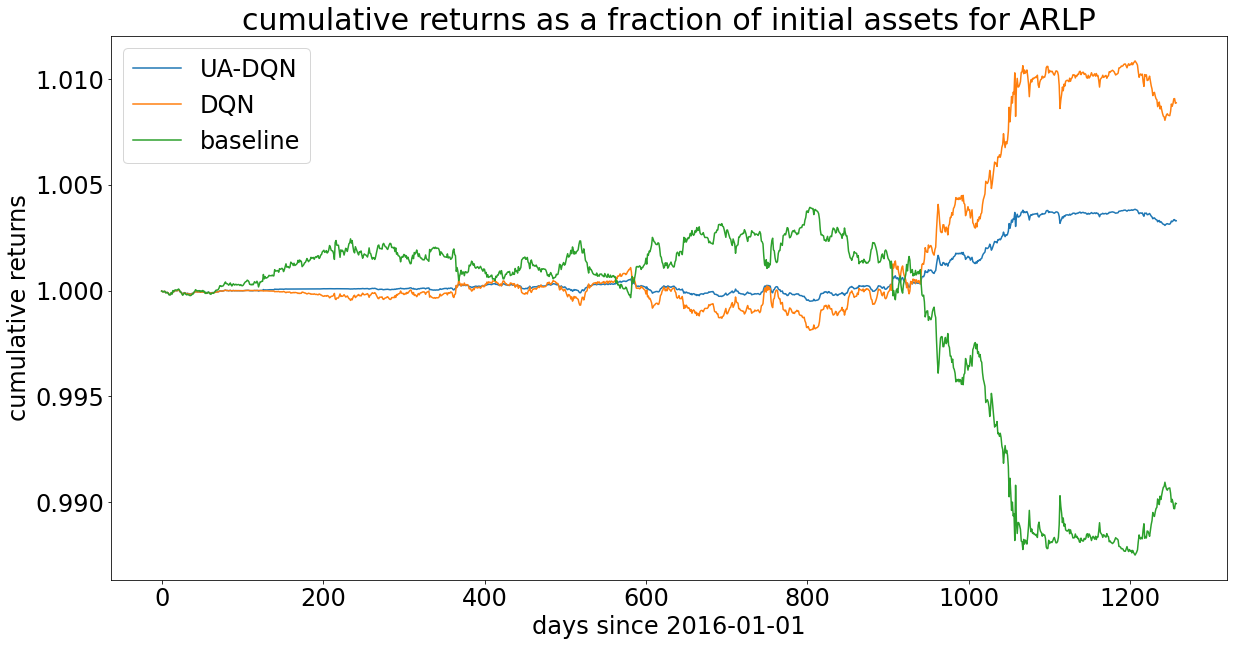

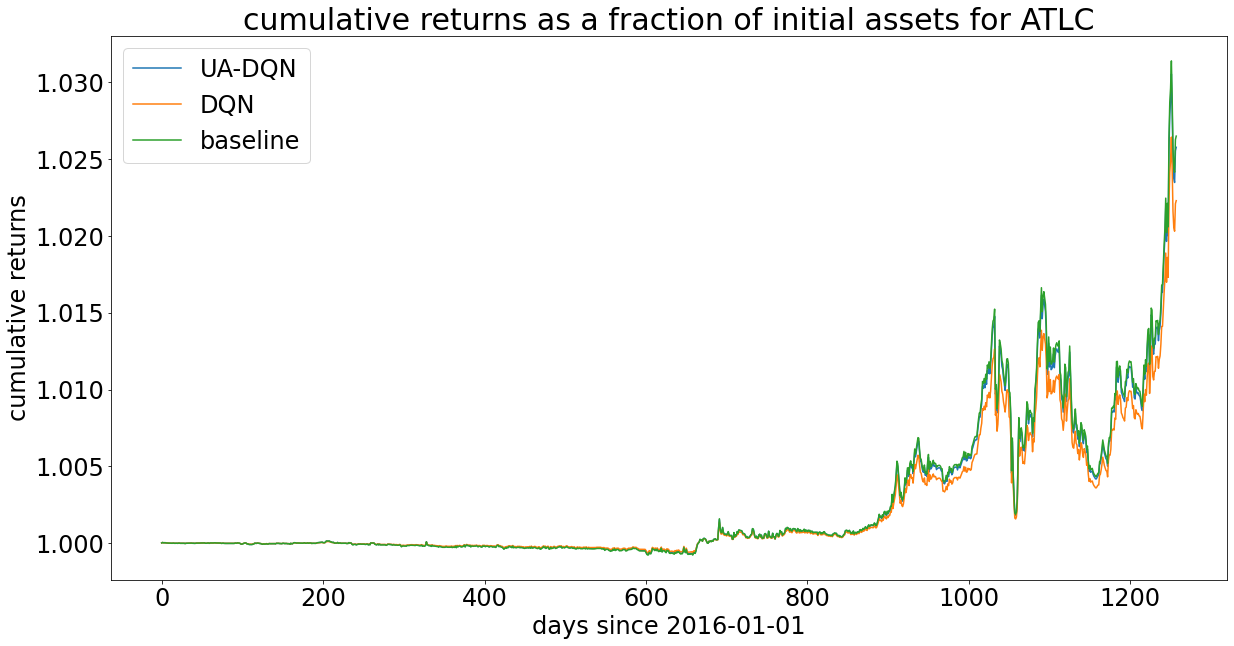

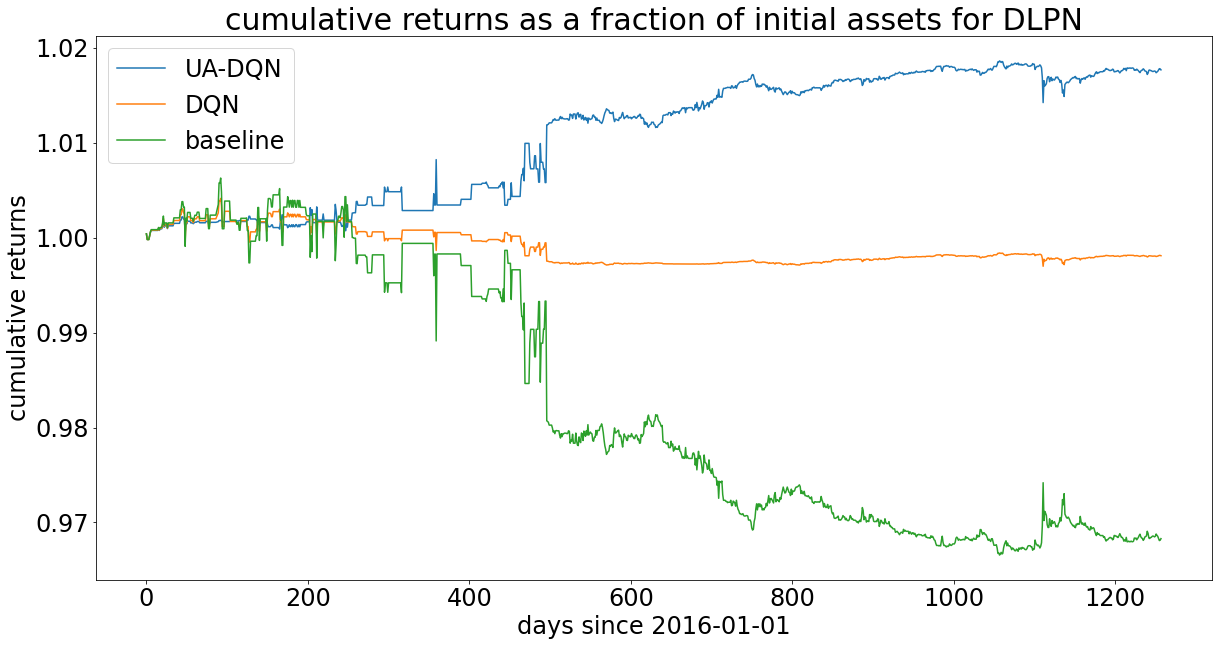

In [2]:
# cumulative return plots for validation data

baseline_path = 'Baseline/StockTradingEnv-v1-'
uadqn_path = 'AgentUADQN/StockTradingEnv-v1-'
dqn_path = 'AgentDQN/StockTradingEnv-v1-'
uadqn_total_path = 'AgentUADQNTotal/StockTradingEnv-v3-'
save_path = 'analysis/'

cr_file = 'cumulative_return.npy'
crwl_file = 'cumulative_return_while_learning.npy'
recorder_file = 'recorder.npy'
action_file = 'action_over_time.npy'
action_wl_file = 'action_over_time_while_learning.npy'

tickers = ['AMD', 'BB', 'MKTY', 'DORM', 'RRD', 'ARLP', 'ATLC', 'DLPN']

for ticker in tickers:
    file_name = uadqn_path + ticker + '_0/' + cr_file
    cr_data = np.load(file_name)
    plt.figure(figsize=(20,10))
    plt.title('cumulative returns as a fraction of initial assets for {}'.format(ticker), fontsize=30)
    plt.xlabel('days since 2016-01-01', fontsize=24)
    plt.ylabel('cumulative returns', fontsize=24)
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24)
    
    plt.plot(cr_data, label='UA-DQN')
    
    file_name = dqn_path + ticker + '_0/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='DQN')
    
    file_name = baseline_path + ticker + '/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='baseline')
    plt.legend(fontsize=24)
    plt.savefig(save_path+'cumulative_returns_{}.jpg'.format(ticker))
    
    



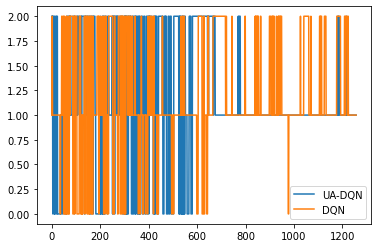

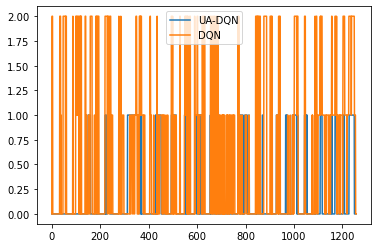

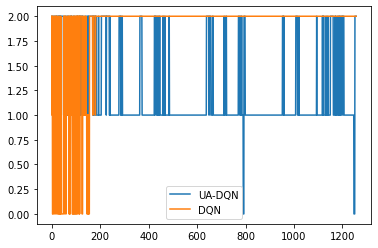

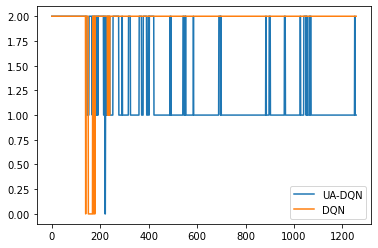

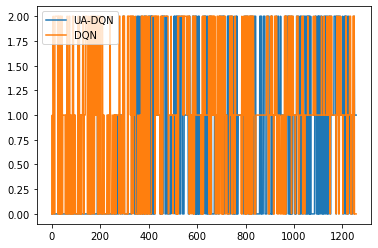

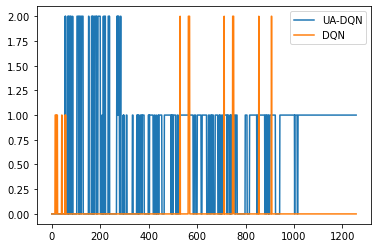

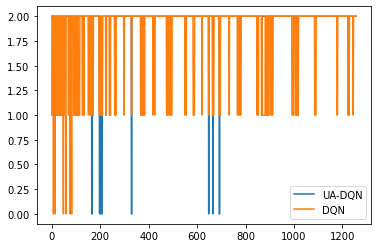

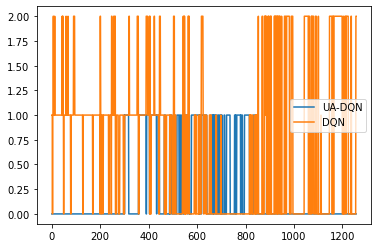

In [3]:
# selected action plots for UADQN and DQN
for ticker in tickers:
    file_name = uadqn_path + ticker + '_0/' + action_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='UA-DQN')
    
    file_name = dqn_path + ticker + '_0/' + action_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='DQN')
    
    plt.legend()
    plt.show()

In [5]:
file_name = uadqn_path + ticker + '_0/' + recorder_file
loss = np.load(file_name)[:, -2]

In [7]:
# get cumulated returns
tickers = ['AMD', 'BB', 'MKTY', 'DORM', 'RRD', 'ARLP', 'ATLC', 'DLPN']
result_data = pd.DataFrame(columns=['Stock Name', 'DQN', 'UA-DQN', 'Baseline' , 'UA-DQN 1'])

uadqn_path_2 = 'AgentUADQN/StockTradingEnv-v2-'
uadqn_path_3 = 'AgentUADQN/StockTradingEnv-v3-'

for ticker in tickers:
    file_name = uadqn_path + ticker + '_0/' + cr_file
    uadqn = np.load(file_name)[-1]
    
    file_name = uadqn_path_2 + ticker + '_0/' + cr_file
    uadqn1 = np.load(file_name)[-1]
    
    file_name = uadqn_path_3 + ticker + '_0/' + cr_file
    uadqn2 = np.load(file_name)[-1]
    
    file_name = dqn_path + ticker + '_0/' + cr_file
    dqn = np.load(file_name)[-1]
    
    file_name = baseline_path + ticker + '/' + cr_file
    baseline = np.load(file_name)[-1]
    
    result_data = result_data.append({'Stock Name': ticker, 'DQN': dqn, 'UA-DQN': uadqn, 
                                      'Baseline': baseline, 'UA-DQN 1': uadqn1, 'UA-DQN 2': uadqn2}, ignore_index=True)

In [8]:
result_data

Stock Name       DQN    UA-DQN  Baseline  UA-DQN 1  UA-DQN 2
0        AMD  1.020747  1.022819  1.091272  1.046427  1.091272
1         BB  1.000547  1.000933  0.998036  1.001442  1.001442
2       MKTY  1.004639  1.001407  1.005248  1.005191  1.005089
3       DORM  1.020432  1.012508  1.021563  1.016334  1.011370
4        RRD  0.999441  1.002427  0.992971  1.000235  1.004413
5       ARLP  1.008880  1.003303  0.989927  1.000977  1.003534
6       ATLC  1.022303  1.025778  1.026507  1.005233  1.025444
7       DLPN  0.998092  1.017661  0.968299  1.023850  1.011274

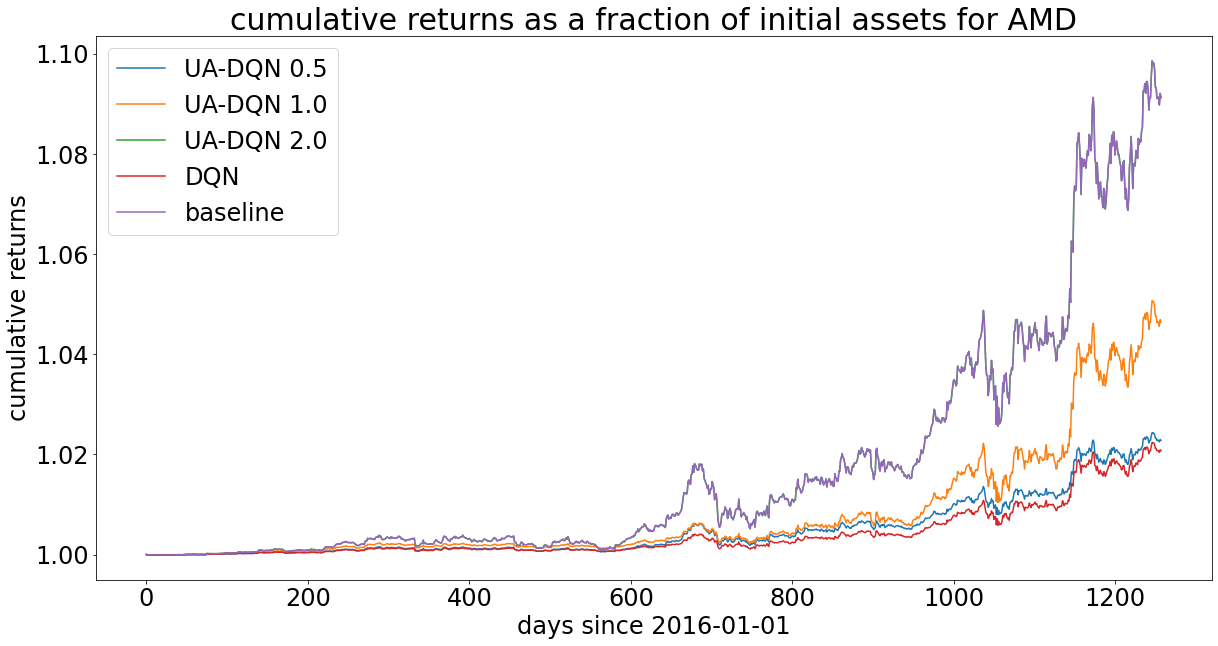

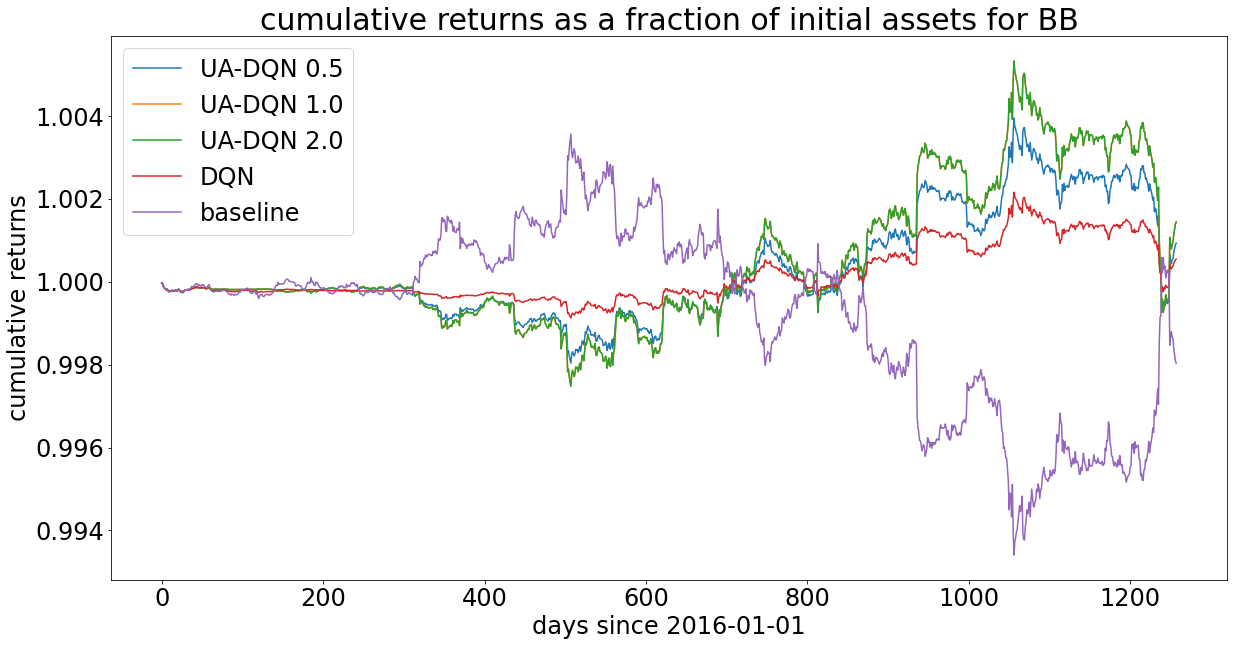

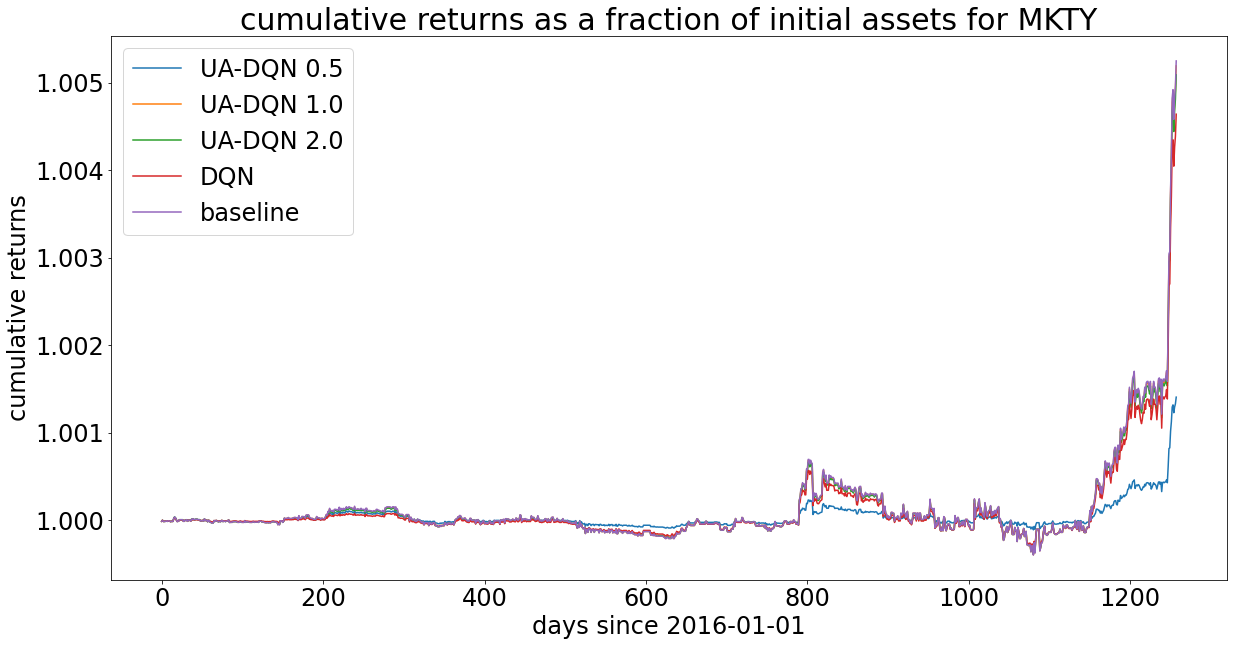

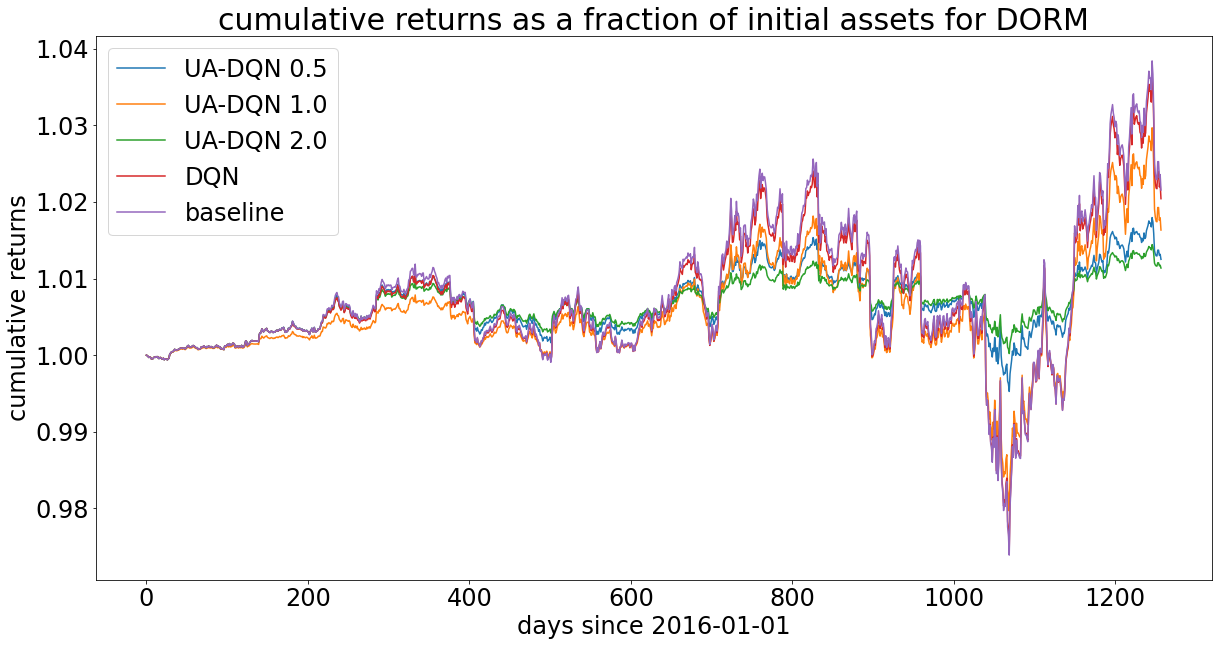

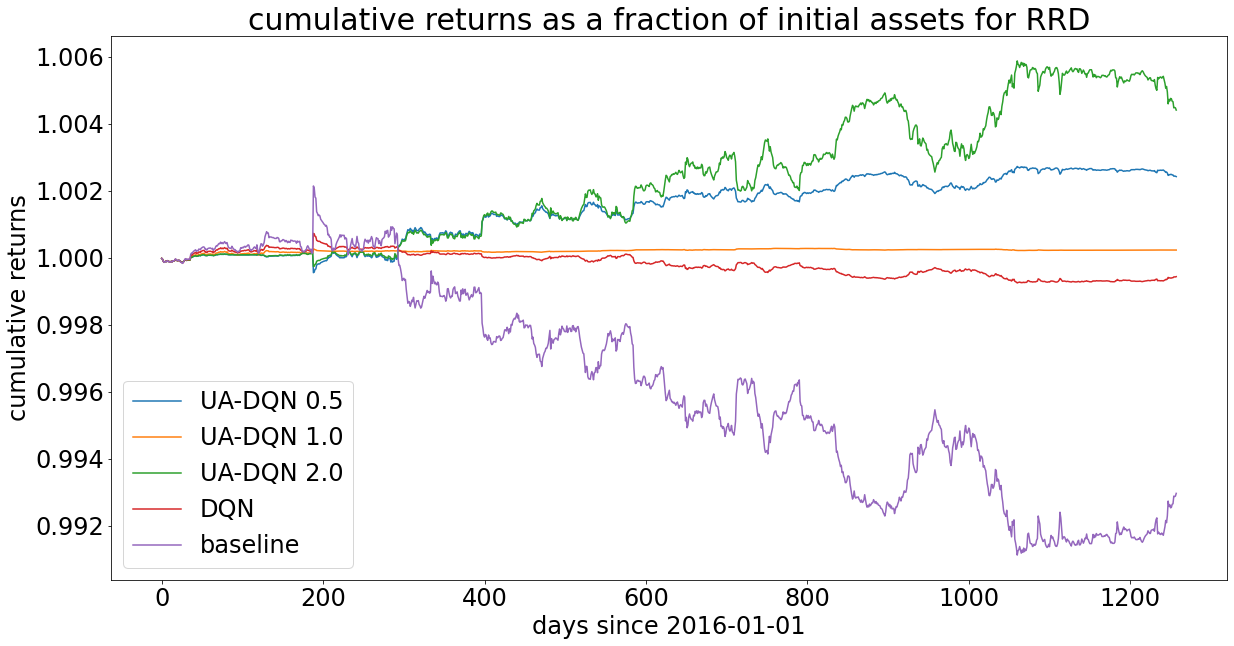

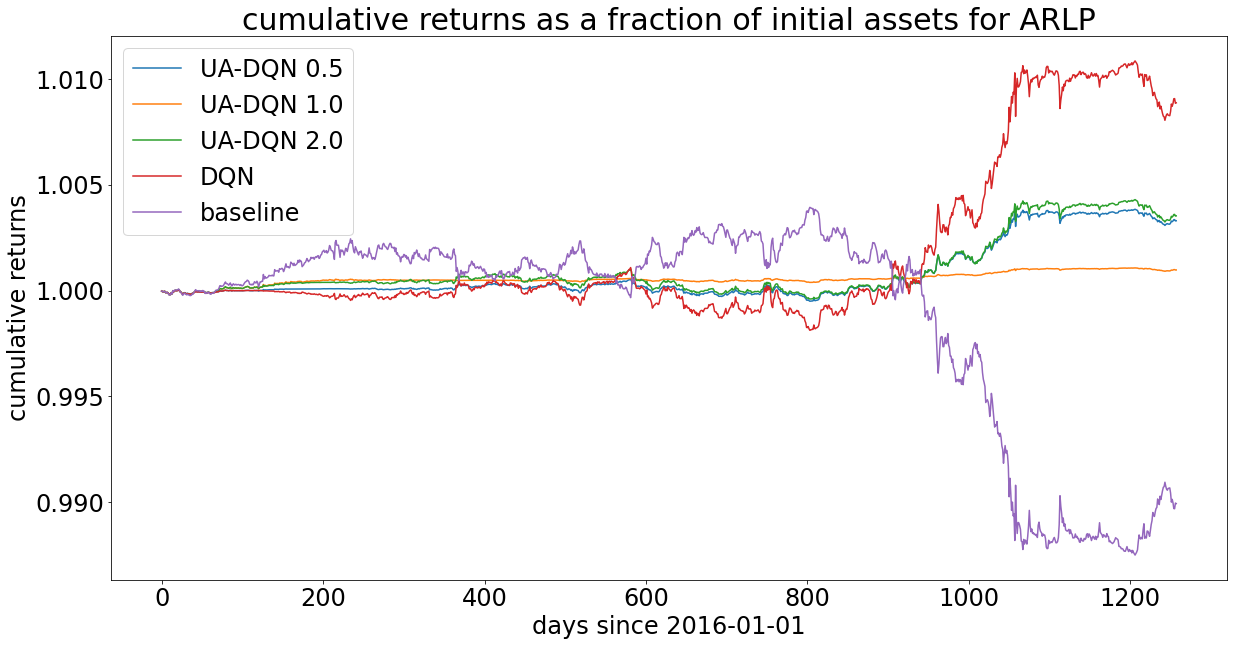

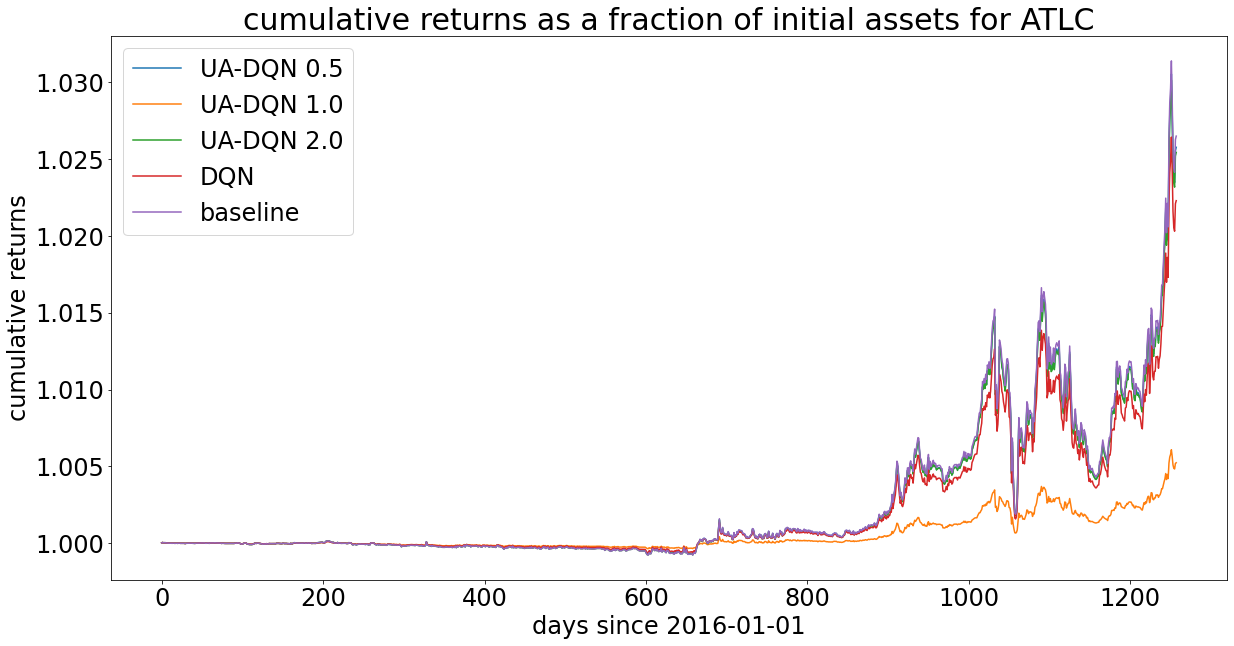

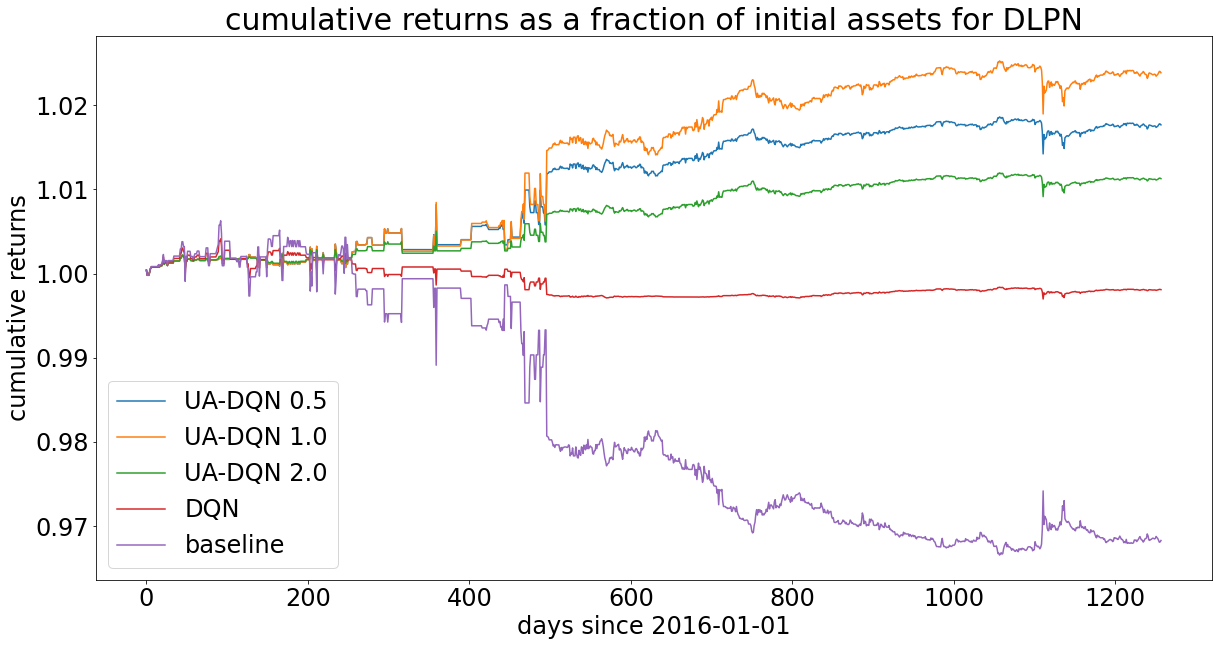

In [9]:
uadqn_path_2 = 'AgentUADQN/StockTradingEnv-v2-'
uadqn_path_3 = 'AgentUADQN/StockTradingEnv-v3-'

tickers = ['AMD', 'BB', 'MKTY', 'DORM', 'RRD', 'ARLP', 'ATLC', 'DLPN']

for ticker in tickers:
    file_name = uadqn_path + ticker + '_0/' + cr_file
    cr_data = np.load(file_name)
    plt.figure(figsize=(20,10))
    plt.title('cumulative returns as a fraction of initial assets for {}'.format(ticker), fontsize=30)
    plt.xlabel('days since 2016-01-01', fontsize=24)
    plt.ylabel('cumulative returns', fontsize=24)
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24)
    
    plt.plot(cr_data, label='UA-DQN 0.5')
    
    file_name = uadqn_path_2 + ticker + '_0/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='UA-DQN 1.0')
    
    file_name = uadqn_path_3 + ticker + '_0/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='UA-DQN 2.0')
    
    file_name = dqn_path + ticker + '_0/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='DQN')
    
    file_name = baseline_path + ticker + '/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='baseline')
    plt.legend(fontsize=24)
    plt.savefig(save_path+'cumulative_returns_modified_lambda_{}.jpg'.format(ticker))

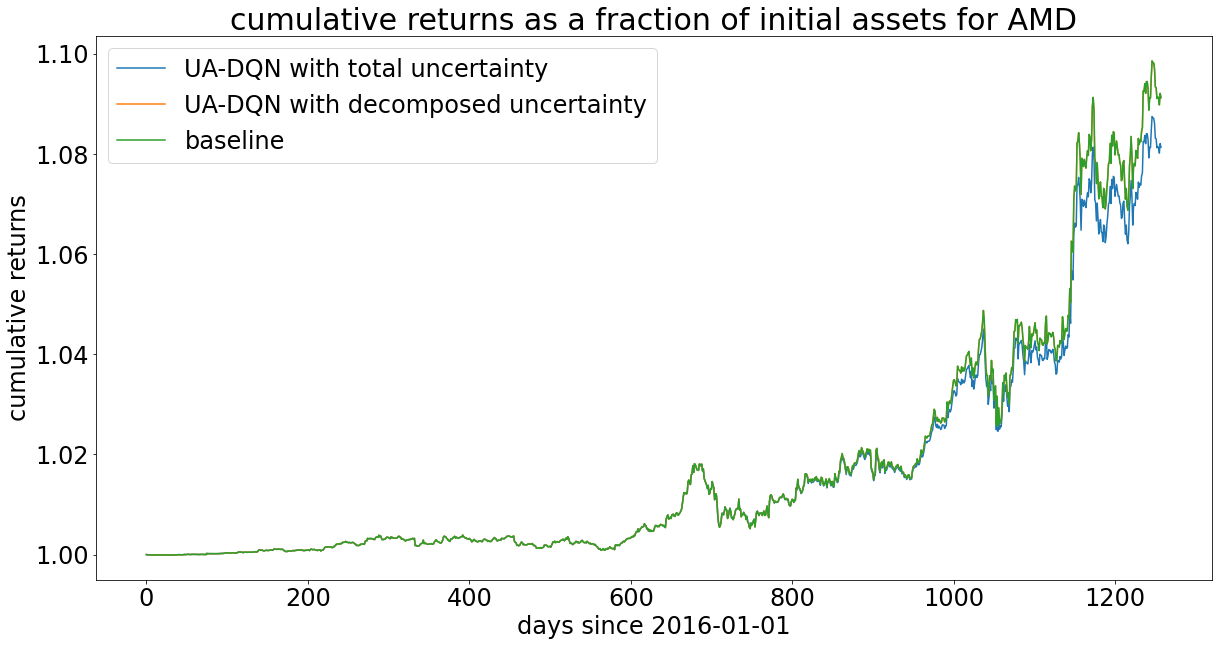

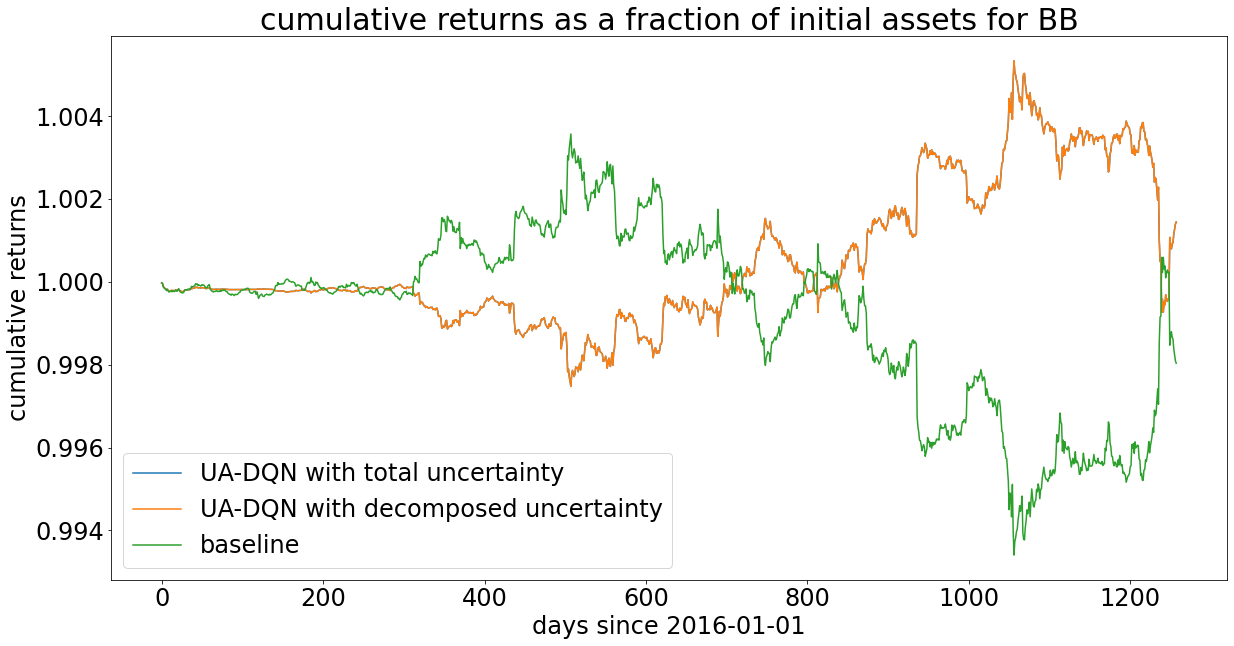

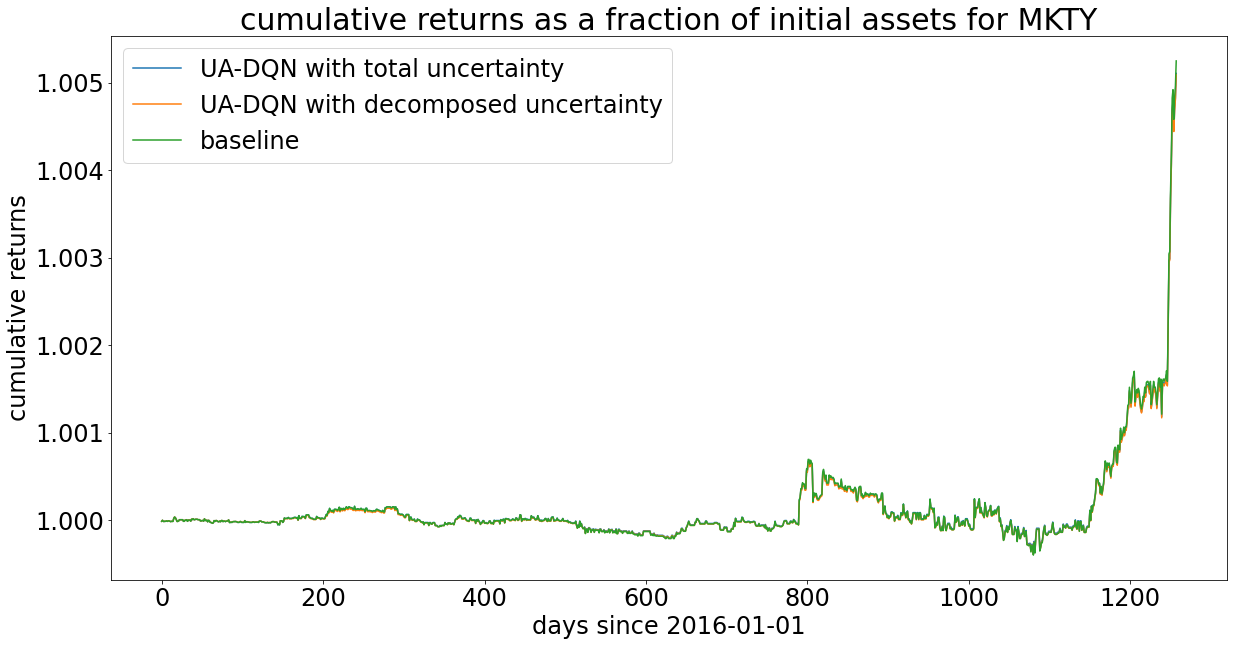

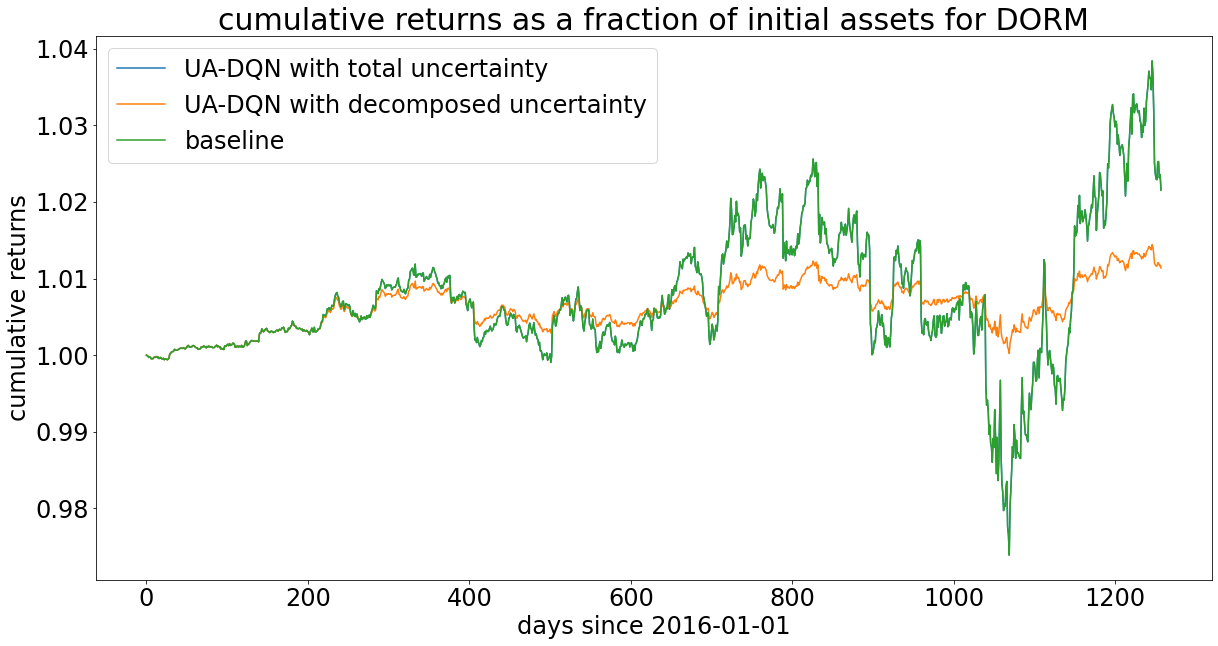

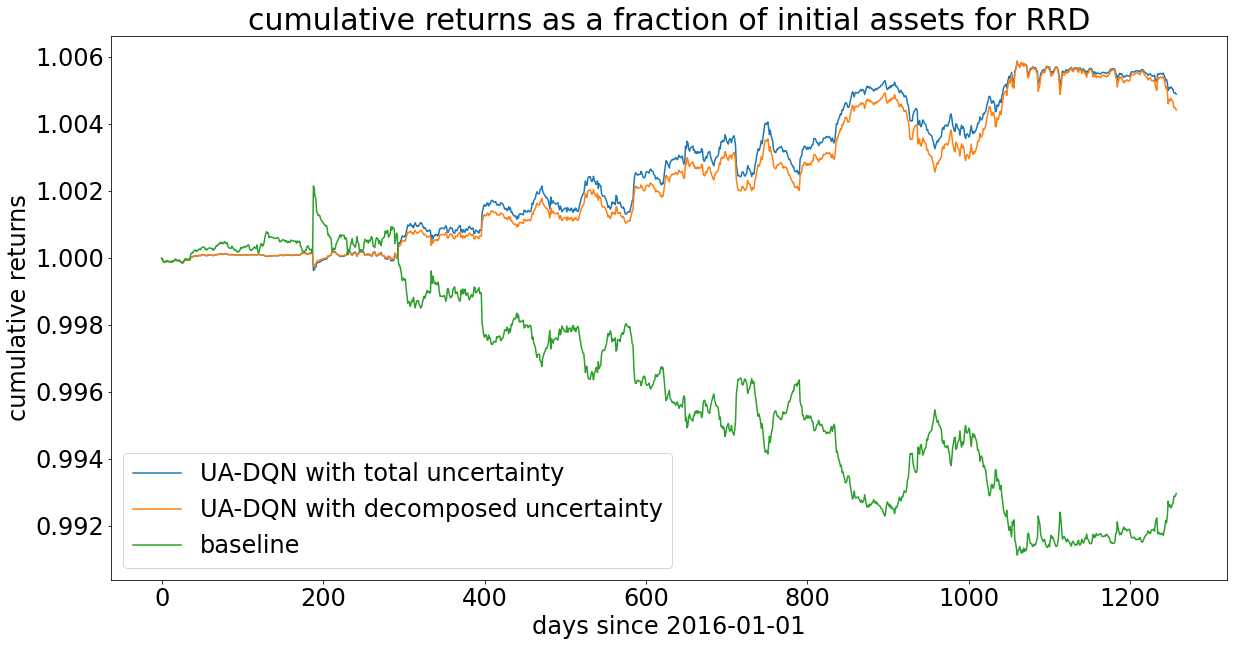

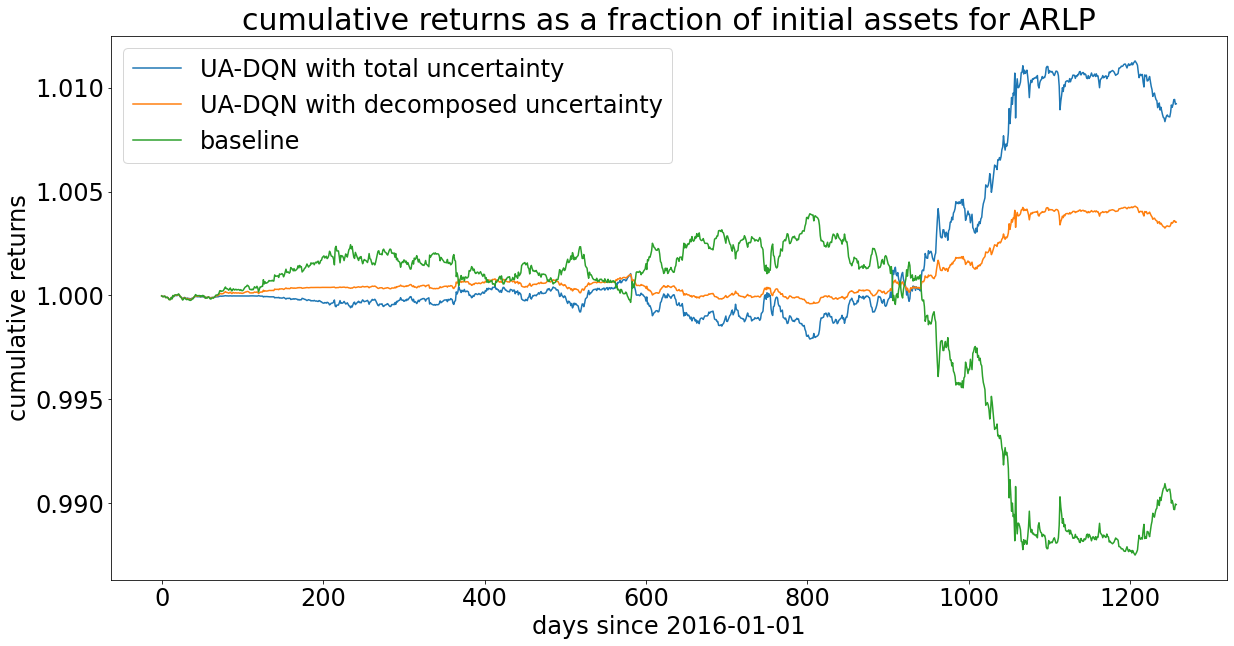

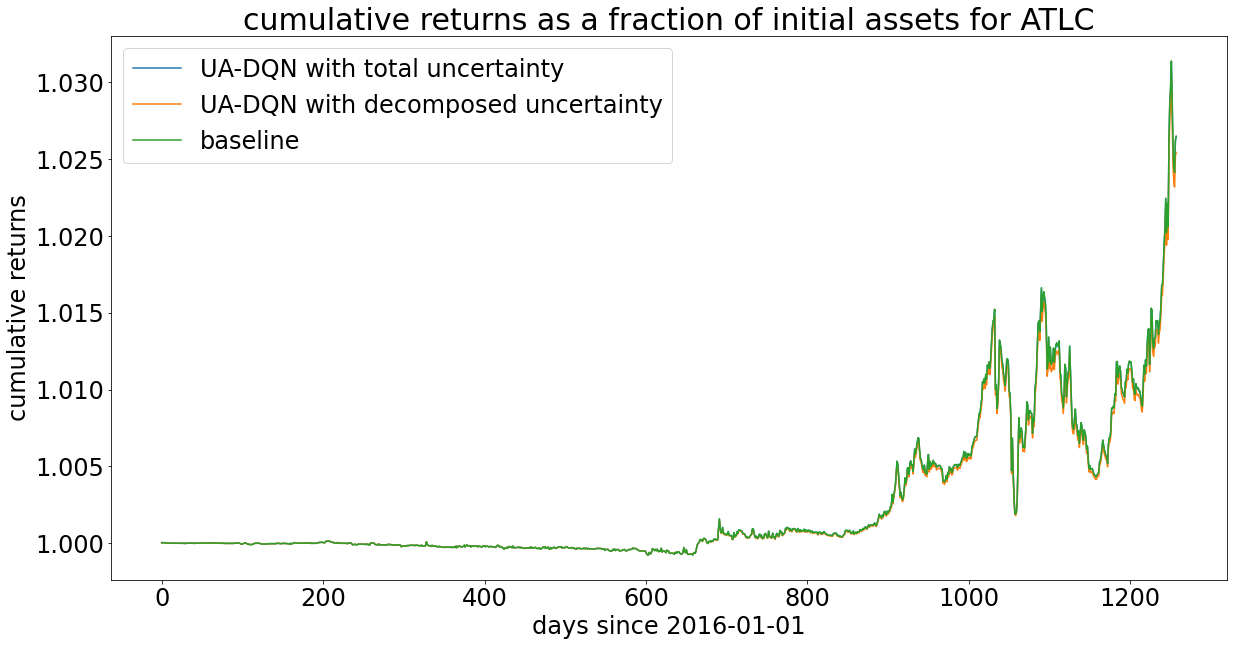

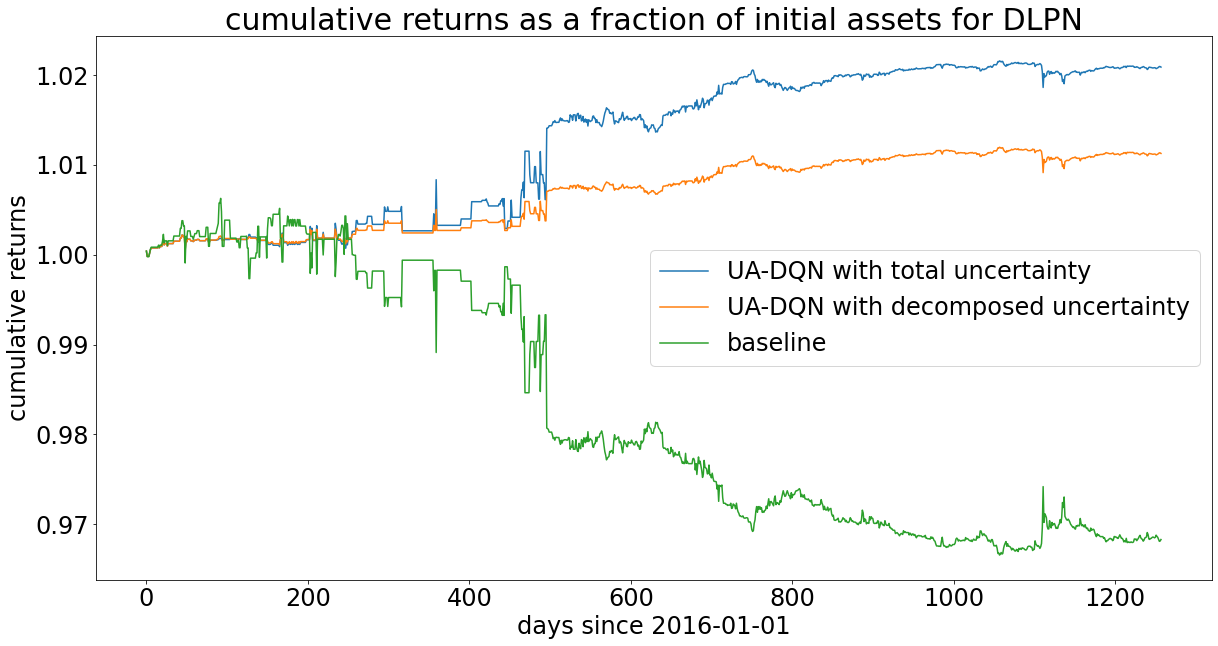

In [57]:
uadqn_path_2 = 'AgentUADQN/StockTradingEnv-v2-'
uadqn_path_3 = 'AgentUADQN/StockTradingEnv-v3-'

tickers = ['AMD', 'BB', 'MKTY', 'DORM', 'RRD', 'ARLP', 'ATLC', 'DLPN']

for ticker in tickers:
    plt.figure(figsize=(20,10))
    plt.title('cumulative returns as a fraction of initial assets for {}'.format(ticker), fontsize=30)
    plt.xlabel('days since 2016-01-01', fontsize=24)
    plt.ylabel('cumulative returns', fontsize=24)
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24)
    
    file_name = uadqn_total_path + ticker + '_0/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='UA-DQN with total uncertainty')
    
    file_name = uadqn_path_3 + ticker + '_0/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='UA-DQN with decomposed uncertainty')
    
    file_name = baseline_path + ticker + '/' + cr_file
    cr_data = np.load(file_name)
    plt.plot(cr_data, label='baseline')
    plt.legend(fontsize=24)
    plt.savefig(save_path+'cumulative_returns_total_{}.jpg'.format(ticker))

In [51]:
# get cumulated returns
tickers = ['AMD', 'BB', 'MKTY', 'DORM', 'RRD', 'ARLP', 'ATLC', 'DLPN']
result_data2 = pd.DataFrame(columns=['Total', 'Stock Name', 'Baseline' , 'UA-DQN 1', 'UA-DQN 2'])

for ticker in tickers:
    
    file_name = uadqn_path_2 + ticker + '_0/' + cr_file
    uadqn1 = np.load(file_name)[-1]
    
    file_name = uadqn_path_3 + ticker + '_0/' + cr_file
    uadqn2 = np.load(file_name)[-1]
    
    file_name = baseline_path + ticker + '/' + cr_file
    baseline = np.load(file_name)[-1]
    
    file_name = uadqn_total_path + ticker + '_0/' + cr_file
    total = np.load(file_name)[-1]
    
    result_data2 = result_data2.append({'Total': total, 'Stock Name': ticker,
                                      'Baseline': baseline, 'UA-DQN 1': uadqn1, 'UA-DQN 2': uadqn2}, ignore_index=True)

In [52]:
result_data2

Total Stock Name  Baseline  UA-DQN 1  UA-DQN 2
0  1.081389        AMD  1.091272  1.046427  1.091272
1  1.001442         BB  0.998036  1.001442  1.001442
2  1.005105       MKTY  1.005248  1.005191  1.005089
3  1.021563       DORM  1.021563  1.016334  1.011370
4  1.004883        RRD  0.992971  1.000235  1.004413
5  1.009236       ARLP  0.989927  1.000977  1.003534
6  1.026463       ATLC  1.026507  1.005233  1.025444
7  1.020882       DLPN  0.968299  1.023850  1.011274

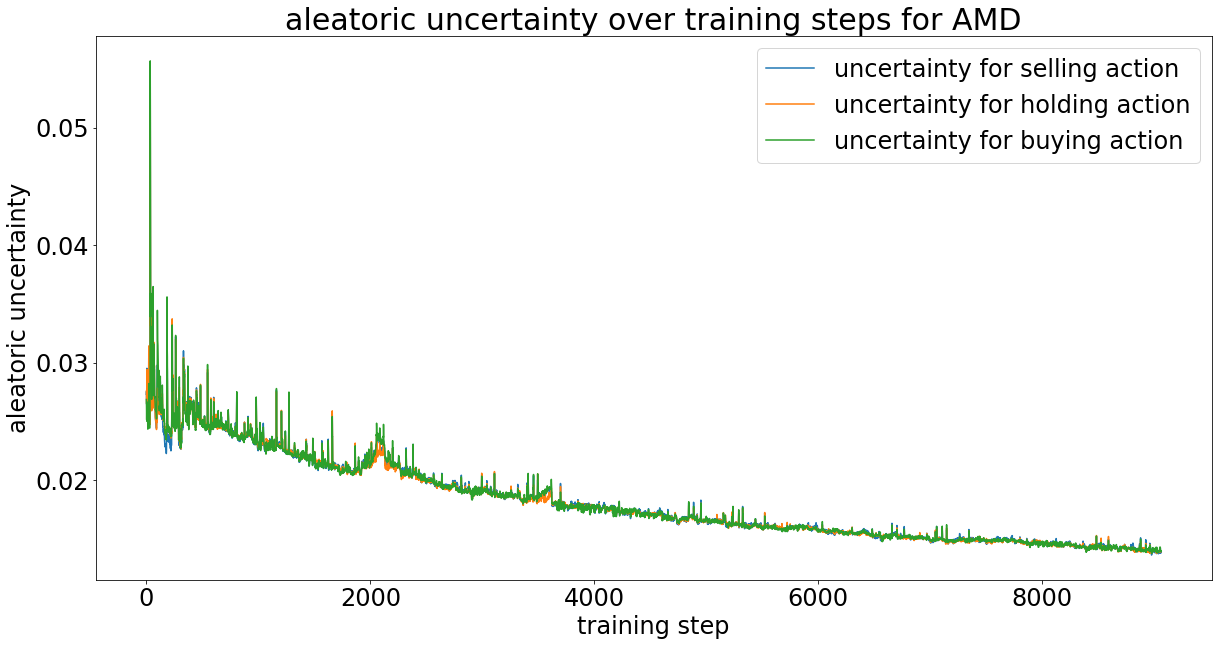

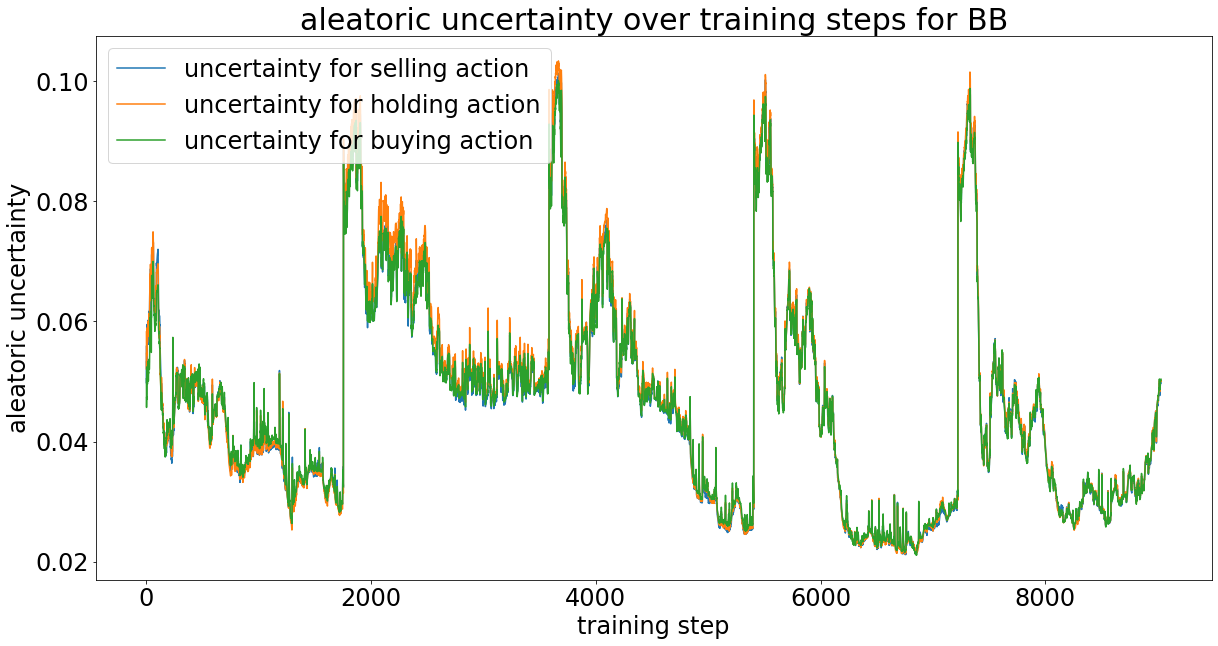

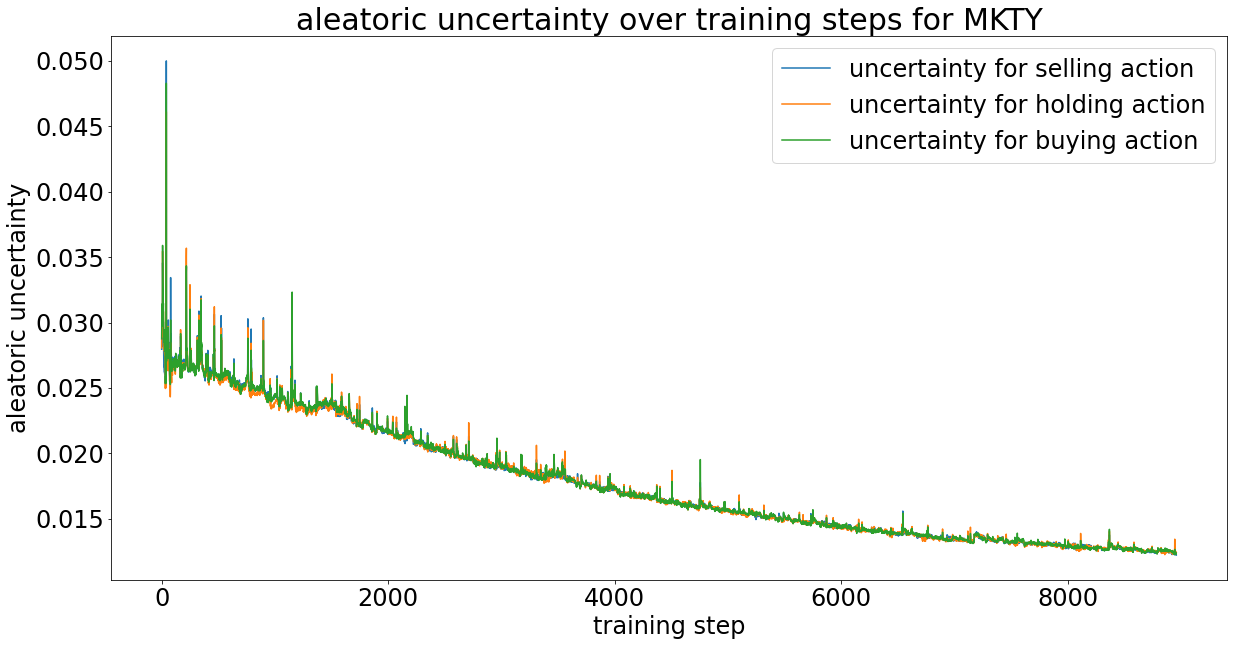

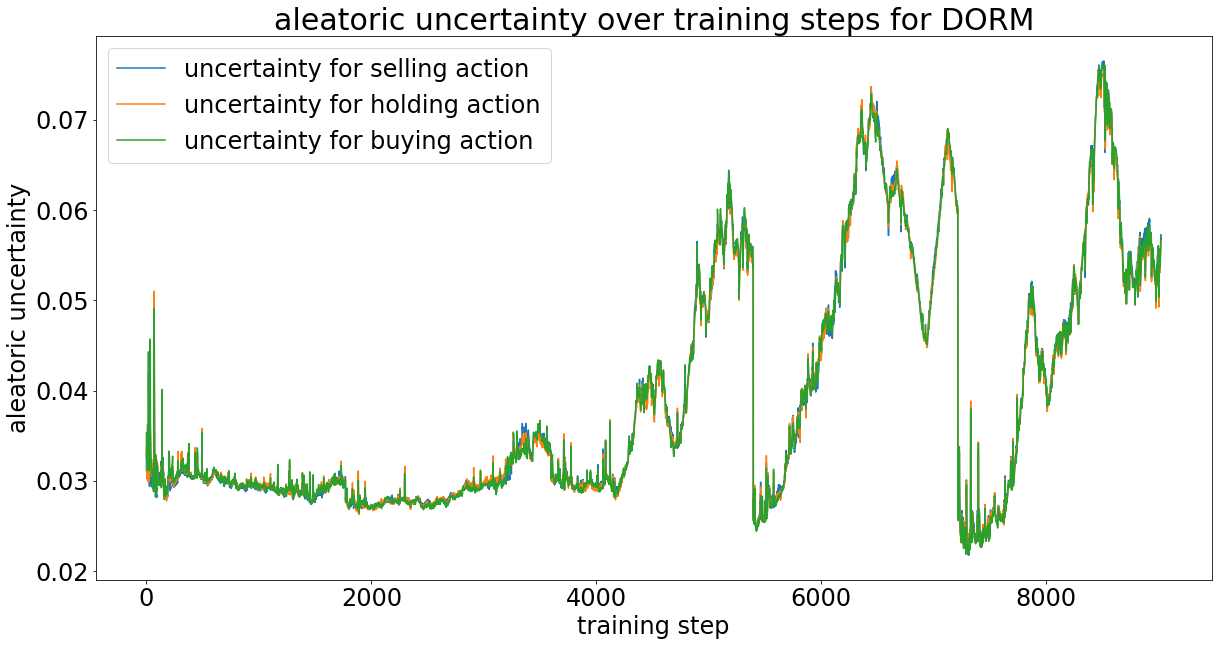

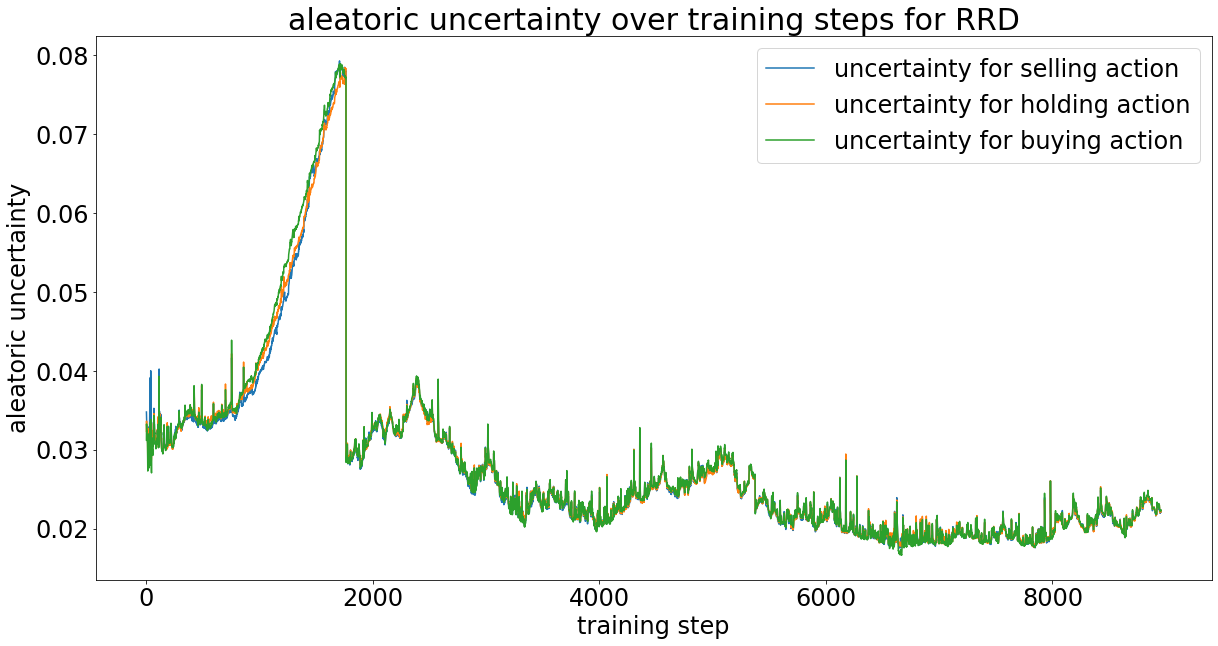

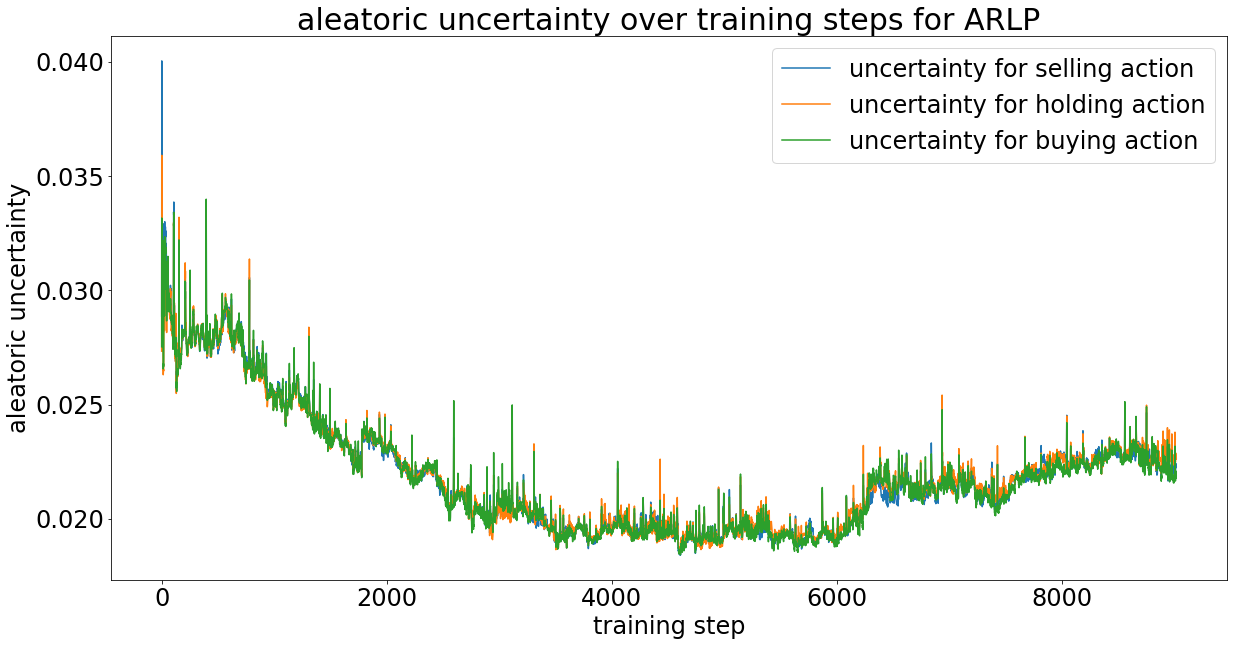

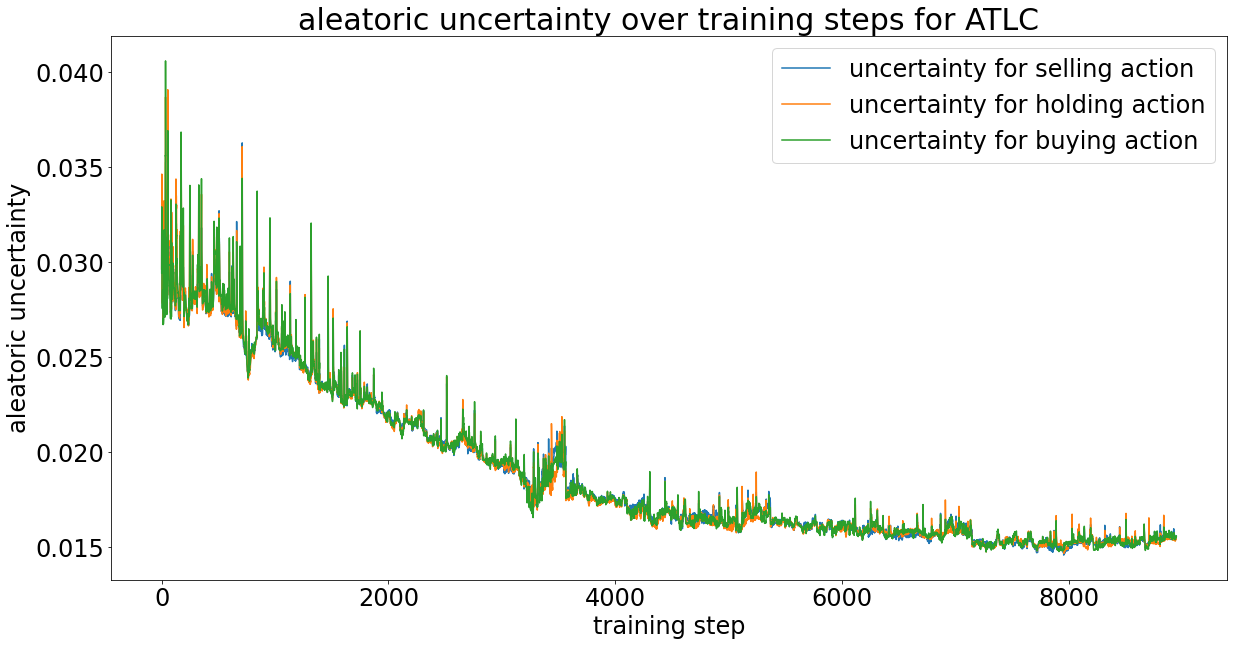

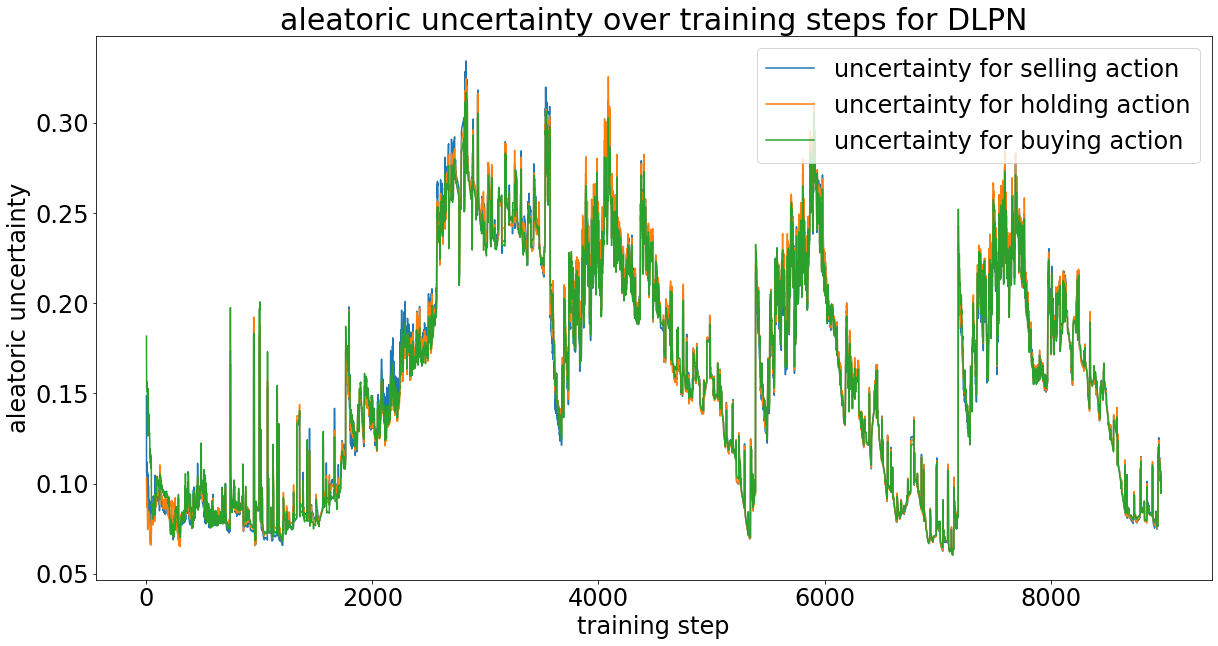

In [73]:
for stock_ticker in tickers:
    amd_aleatoric = torch.load('{}_aleatoric.pt'.format(stock_ticker))
    aleatoric_np = tf.concat([x.cpu() for x in amd_aleatoric], axis=0).numpy()
    
    plt.figure(figsize=(20,10))
    plt.title('aleatoric uncertainty over training steps for {}'.format(stock_ticker), fontsize=30)
    plt.xlabel('training step', fontsize=24)
    plt.ylabel('aleatoric uncertainty', fontsize=24)
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24)
    
    plt.plot(aleatoric_np[:,0], label='uncertainty for selling action')
    plt.plot(aleatoric_np[:,1], label='uncertainty for holding action')
    plt.plot(aleatoric_np[:,2], label='uncertainty for buying action')
    
    plt.legend(fontsize=24)
    plt.savefig(save_path+'aleatoric_{}.jpg'.format(stock_ticker))
    

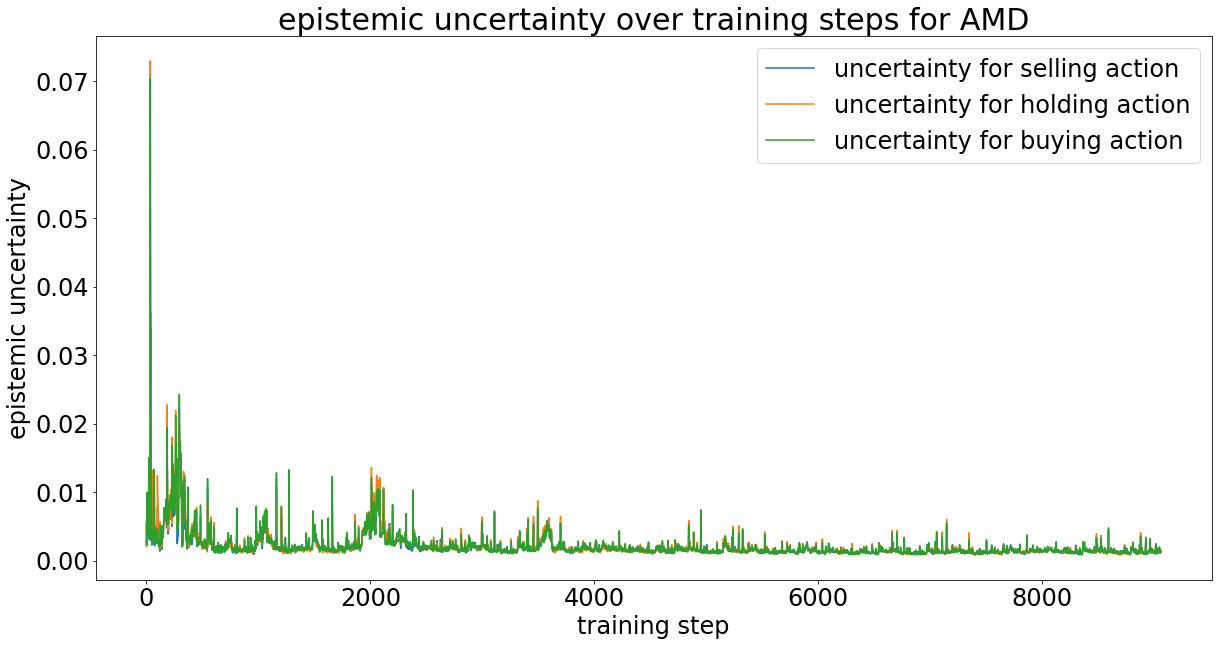

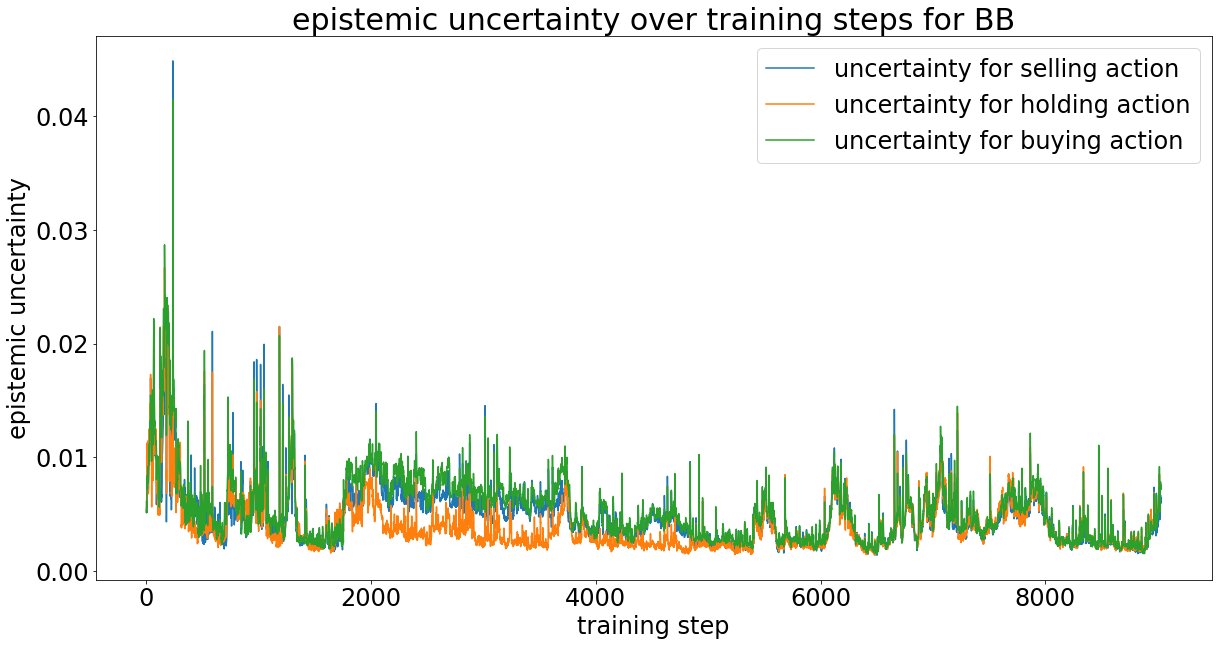

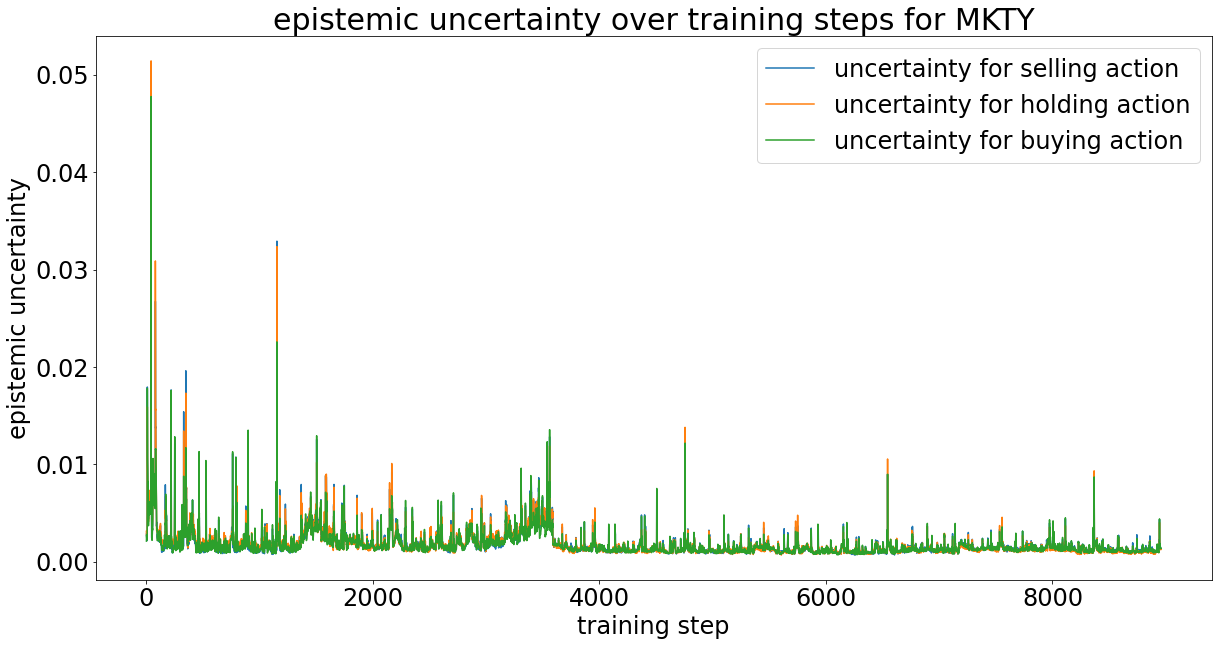

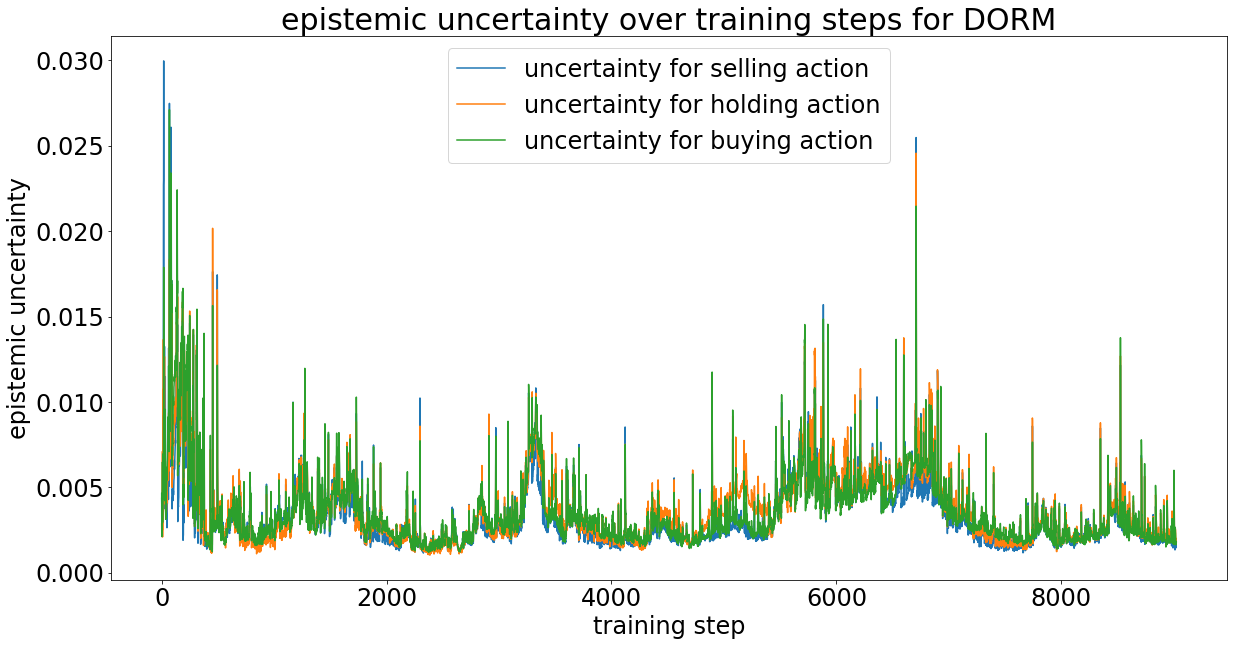

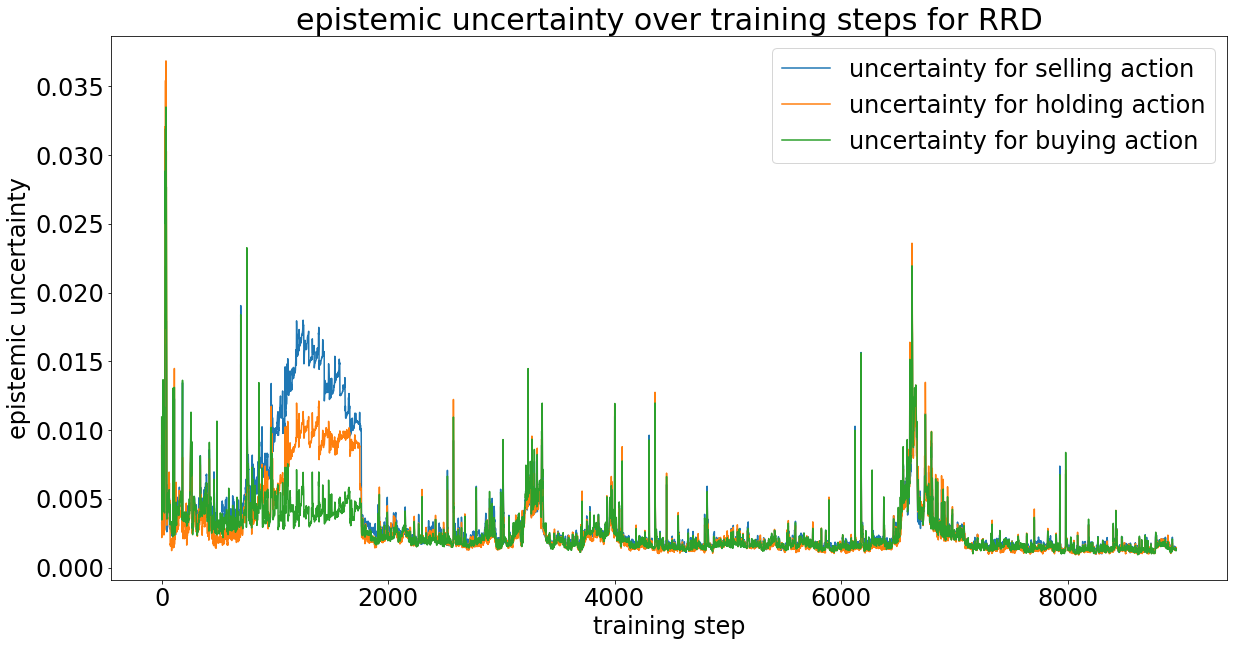

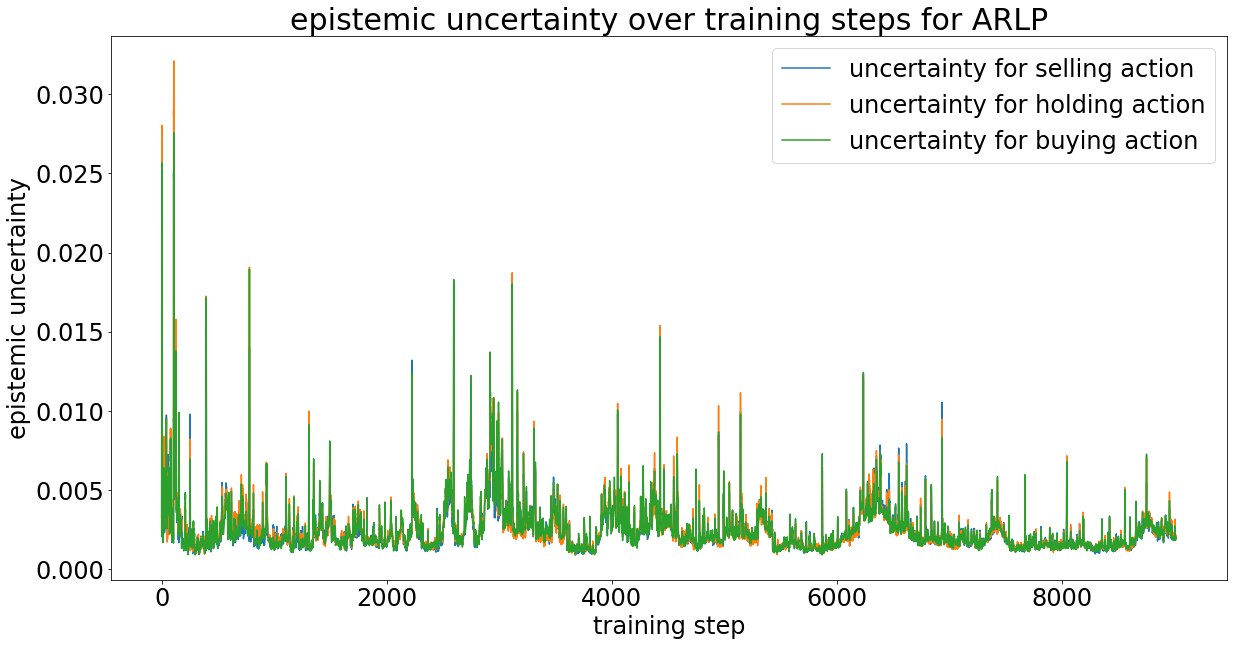

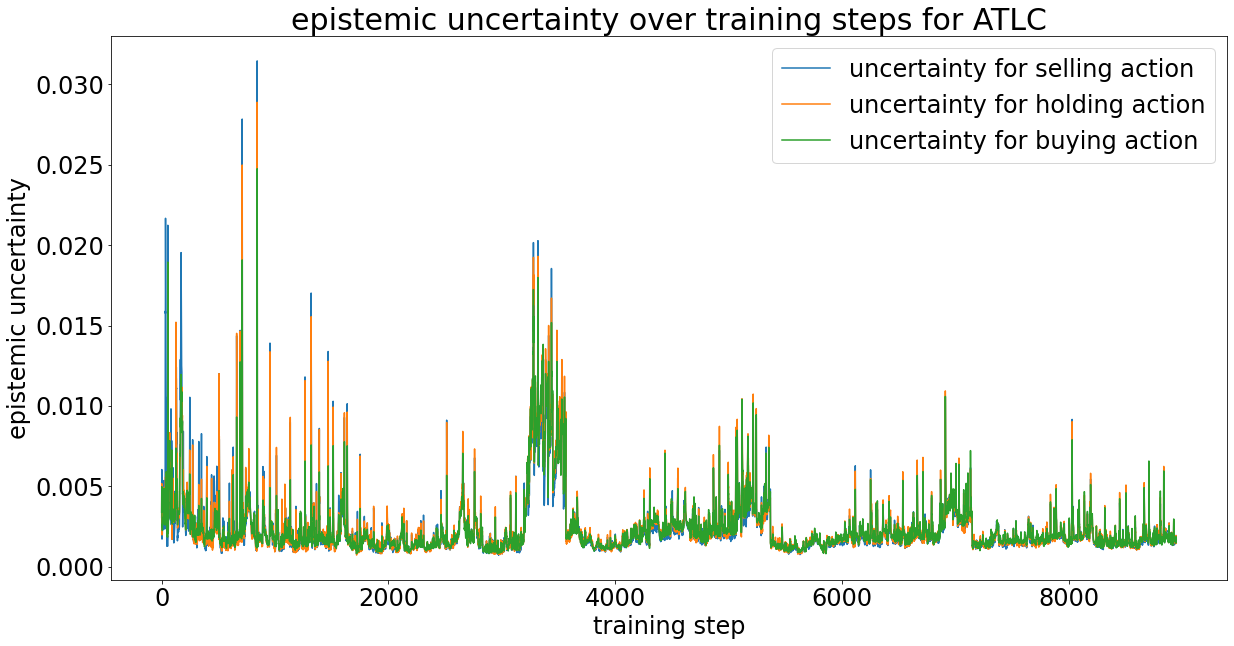

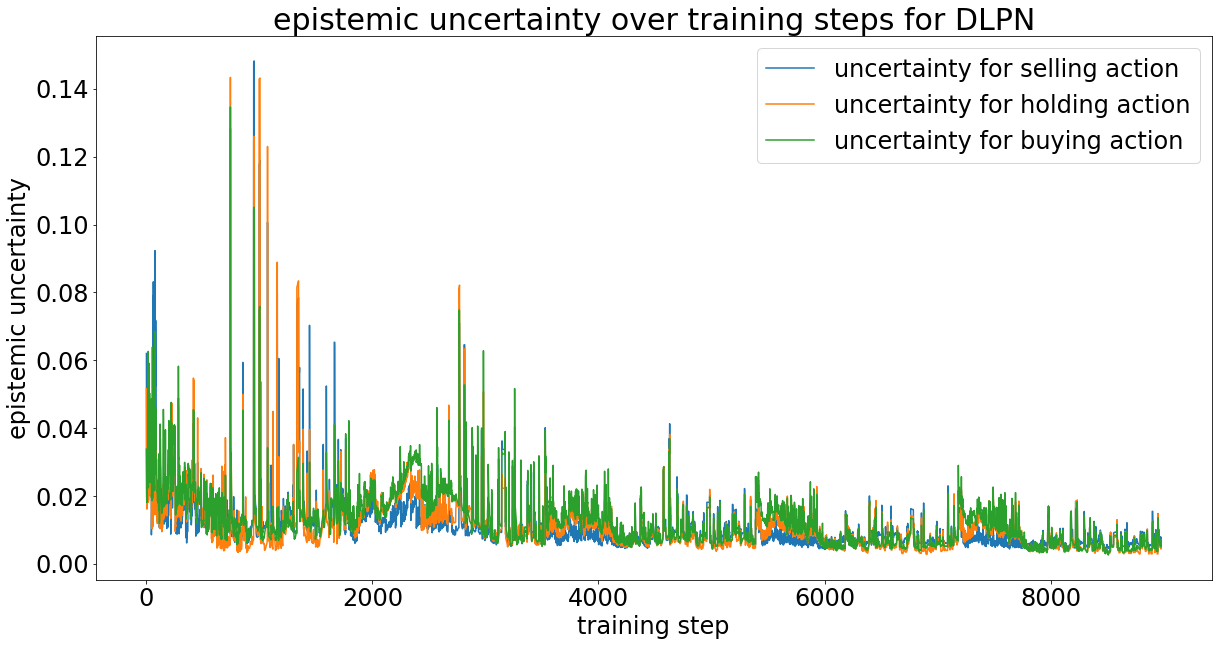

In [74]:
for stock_ticker in tickers:
    amd_epistemic = torch.load('{}_epistemic.pt'.format(stock_ticker))
    epistemic_np = tf.concat([x.cpu() for x in amd_epistemic], axis=0).numpy()
    
    plt.figure(figsize=(20,10))
    plt.title('epistemic uncertainty over training steps for {}'.format(stock_ticker), fontsize=30)
    plt.xlabel('training step', fontsize=24)
    plt.ylabel('epistemic uncertainty', fontsize=24)
    plt.yticks(fontsize=24)
    plt.xticks(fontsize=24)
    
    plt.plot(epistemic_np[:,0], label='uncertainty for selling action')
    plt.plot(epistemic_np[:,1], label='uncertainty for holding action')
    plt.plot(epistemic_np[:,2], label='uncertainty for buying action')
    
    plt.legend(fontsize=24)
    plt.savefig(save_path+'epistemic_{}.jpg'.format(stock_ticker))

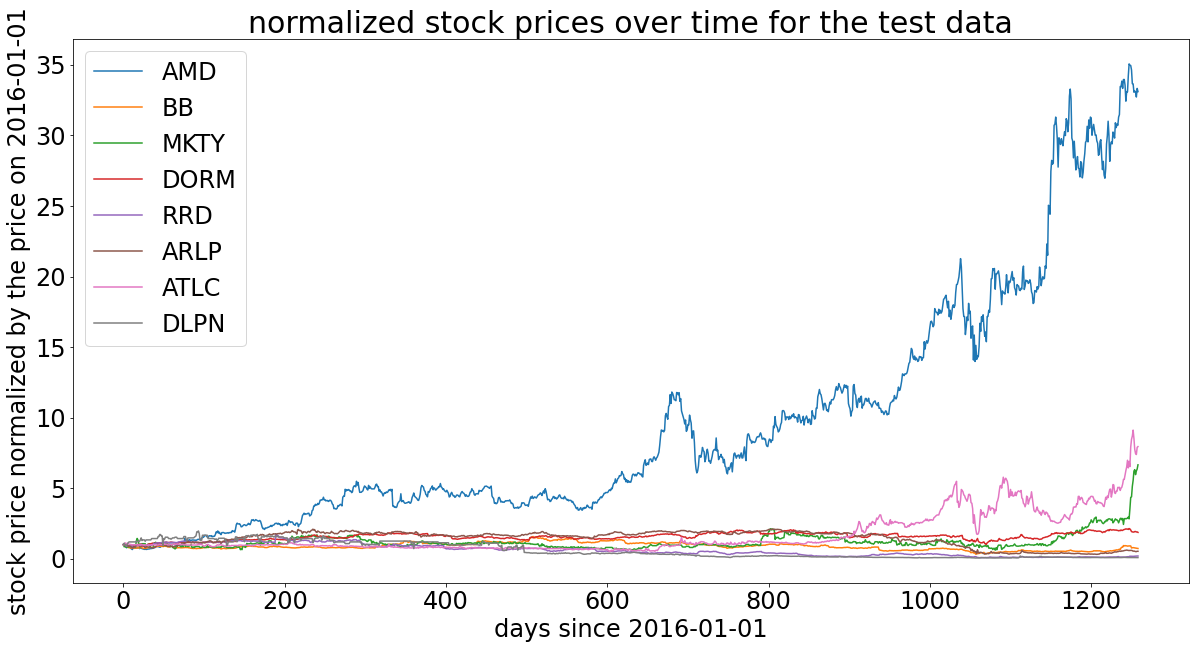

In [44]:
# plot stock prices over time
plt.figure(figsize=(20,10))
plt.title('normalized stock prices over time for the test data', fontsize=30)
plt.xlabel('days since 2016-01-01', fontsize=24)
plt.ylabel('stock price normalized by the price on 2016-01-01', fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)

for ticker in tickers:
    
    file_name = dqn_path + ticker + '_0/price_over_time.npy'
    price_data = np.load(file_name)
    price_data = price_data / price_data[0]
    plt.plot(price_data, label=ticker)
plt.legend(fontsize=24)
plt.savefig('stock_prices.jpg')